# Load Libraries

In [891]:
# Import packages/libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # to add nice background to the plots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from uszipcode import SearchEngine
from uszipcode import Zipcode


# to display graphs in Jupyter notebook
%matplotlib inline       
#from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

# Load and Explore the Data

In [892]:
data = pd.read_csv("Loan_Modelling.csv")
data.shape
df = data.copy()

### Check the number of rows and columns

In [893]:
df.shape

(5000, 14)

### Check column names

In [894]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

### Overview of Data

In [895]:
df.head(10)

ID  Age  Experience  Income  ZIPCode  Family    CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4 1.600000          1         0   
1   2   45          19      34    90089       3 1.500000          1         0   
2   3   39          15      11    94720       1 1.000000          1         0   
3   4   35           9     100    94112       1 2.700000          2         0   
4   5   35           8      45    91330       4 1.000000          2         0   
5   6   37          13      29    92121       4 0.400000          2       155   
6   7   53          27      72    91711       2 1.500000          2         0   
7   8   50          24      22    93943       1 0.300000          3         0   
8   9   35          10      81    90089       3 0.600000          2       104   
9  10   34           9     180    93023       1 8.900000          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [896]:
df.tail(10)

ID  Age  Experience  Income  ZIPCode  Family    CCAvg  Education  \
4990  4991   55          25      58    95023       4 2.000000          3   
4991  4992   51          25      92    91330       1 1.900000          2   
4992  4993   30           5      13    90037       4 0.500000          3   
4993  4994   45          21     218    91801       2 6.670000          1   
4994  4995   64          40      75    94588       3 2.000000          3   
4995  4996   29           3      40    92697       1 1.900000          3   
4996  4997   30           4      15    92037       4 0.400000          1   
4997  4998   63          39      24    93023       2 0.300000          3   
4998  4999   65          40      49    90034       3 0.500000          2   
4999  5000   28           4      83    92612       3 0.800000          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Check column types and missing values

In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Check column with null values

In [898]:
df.isnull().sum().sort_values(ascending = False)

CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
ID                    0
dtype: int64

### Summary of dataset

In [899]:
df.describe(include = 'all')

ID         Age  Experience      Income      ZIPCode  \
count 5000.000000 5000.000000 5000.000000 5000.000000  5000.000000   
mean  2500.500000   45.338400   20.104600   73.774200 93169.257000   
std   1443.520003   11.463166   11.467954   46.033729  1759.455086   
min      1.000000   23.000000   -3.000000    8.000000 90005.000000   
25%   1250.750000   35.000000   10.000000   39.000000 91911.000000   
50%   2500.500000   45.000000   20.000000   64.000000 93437.000000   
75%   3750.250000   55.000000   30.000000   98.000000 94608.000000   
max   5000.000000   67.000000   43.000000  224.000000 96651.000000   

           Family       CCAvg   Education    Mortgage  Personal_Loan  \
count 5000.000000 5000.000000 5000.000000 5000.000000    5000.000000   
mean     2.396400    1.937938    1.881000   56.498800       0.096000   
std      1.147663    1.747659    0.839869  101.713802       0.294621   
min      1.000000    0.000000    1.000000    0.000000       0.000000   
25%      1.000000    0.700000    1.000000    0.000000       0.000000   
50%      2.000000    1.500000    2.000000    0.000000       0.000000   
75%      3.000000    2.500000    3.000000  101.000000       0.000000   
max      4.000000   10.000000    3.000000  635.000000       1.000000   

       Securities_Account  CD_Account      Online  CreditCard  
count         5000.000000 5000.000000 5000.000000 5000.000000  
mean             0.104400    0.060400    0.596800    0.294000  
std              0.305809    0.238250    0.490589    0.455637  
min              0.000000    0.000000    0.000000    0.000000  
25%              0.000000    0.000000    0.000000    0.000000  
50%              0.000000    0.000000    1.000000    0.000000  
75%              0.000000    0.000000    1.000000    1.000000  
max              1.000000    1.000000    1.000000    1.000000

### OBSERVATIONS:
* total no of rows is 5000
* total no of columns is 14
* dependent variable is Personal_Loan
* more than 75% of customers do not get a Personal Loan, will find out actual % later
* there are no Null values
* the average age is 45.33 years with a std of almost 11.5.
* mean experience is 20 years
* income is right skewed 
* looks like less than 25% of people accpeted personal loans offered to them
* more than 50% of Mortgage values are 0, that is more than half of the cutomers do not own homes
* Family, Education, Personal_Loan, Securities_Account, CD_Account, Online and CreditCard should be changed to type catgory
* drop ID column


In [900]:
# drop ID column

df.drop(['ID'], axis=1, inplace = True)

In [901]:
df.head()

Age  Experience  Income  ZIPCode  Family    CCAvg  Education  Mortgage  \
0   25           1      49    91107       4 1.600000          1         0   
1   45          19      34    90089       3 1.500000          1         0   
2   39          15      11    94720       1 1.000000          1         0   
3   35           9     100    94112       1 2.700000          2         0   
4   35           8      45    91330       4 1.000000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

#### Change Family, Education, Personal_Loan, Securities_Account, CD_Account, Online and CreditCard to category data type

In [902]:
# change family dtype to category

df['Family'] = df['Family'].astype('category')
df.Family.dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [903]:
# change Education dtype to category

df['Education'] = df['Education'].astype('category')
df.Education.dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [904]:
# change Personal_Loan dtype to category

df['Personal_Loan'] = df['Personal_Loan'].astype('category')
df.Personal_Loan.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [905]:
# change Securities_Account dtype to category

df['Securities_Account'] = df['Securities_Account'].astype('category')
df.Securities_Account.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [906]:
# change CD_Account dtype to category

df['CD_Account'] = df['CD_Account'].astype('category')
df.Securities_Account.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [907]:
# change Online dtype to category

df['Online'] = df['Online'].astype('category')
df.Online.dtype 

CategoricalDtype(categories=[0, 1], ordered=False)

In [908]:
# change CreditCard dtype to category

df['CreditCard'] = df['CreditCard'].astype('category')
df.CreditCard.dtype 

CategoricalDtype(categories=[0, 1], ordered=False)

In [909]:
 df.ZIPCode.unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [910]:
 df.Income.unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [911]:
 df.Age.unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [912]:
 df.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [913]:
 df.CCAvg.unique()


array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

### Do we need to handle the negative values in Experience column?

In [914]:
df.groupby('Experience').size()

Experience
-3      4
-2     15
-1     33
 0     66
 1     74
       ..
 39    85
 40    57
 41    43
 42     8
 43     3
Length: 47, dtype: int64

#### OBSERVATION:
* only 52 out of 5000 entries have negative experience. 
* this is only 1% of the data

#### ACTION: 
* will be dropping the rows with negative values


In [915]:
# drop the rows with negative Experience values

indexNegative = df[(df['Experience']< 0)].index


In [916]:
print(indexNegative)

Int64Index([  89,  226,  315,  451,  524,  536,  540,  576,  583,  597,  649,
             670,  686,  793,  889,  909, 1173, 1428, 1522, 1905, 2102, 2430,
            2466, 2545, 2618, 2717, 2848, 2876, 2962, 2980, 3076, 3130, 3157,
            3279, 3284, 3292, 3394, 3425, 3626, 3796, 3824, 3887, 3946, 4015,
            4088, 4116, 4285, 4411, 4481, 4514, 4582, 4957],
           dtype='int64')


In [917]:
df.drop(indexNegative, inplace = True)

In [918]:
# check to see rows were dropped
# can see 52 rows have been dropped

df.shape

(4948, 13)

## EDA numerical data

### Univariate Analysis - Numerical

In [919]:
pd.set_option('display.float_format', lambda x: '%3f' %x)  #to display numbers in digits

In [920]:
# function to plot boxplot and histogram of variable

def histo_box(data,figsize=(15,10), bins =None):
    
    f,(ax_box,ax_hist) = plt.subplots(2,sharex=True, gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize )
    
    sns.boxplot(data,ax = ax_box, showmeans=True, color='violet') #plot a boxplot of data with a green triangle marking the mean value 

    
    sns.distplot(data,ax = ax_hist)      # plot histogram of data
    ax_hist.axvline(np.mean(data),color = 'green', linestyle = '--')
    ax_hist.axvline(np.median(data),color = 'black', linestyle = '-')
    plt.show()
 #   sns.violinplot(data, ax = ax_violin, showmeans = True)              # violin plot of data
    

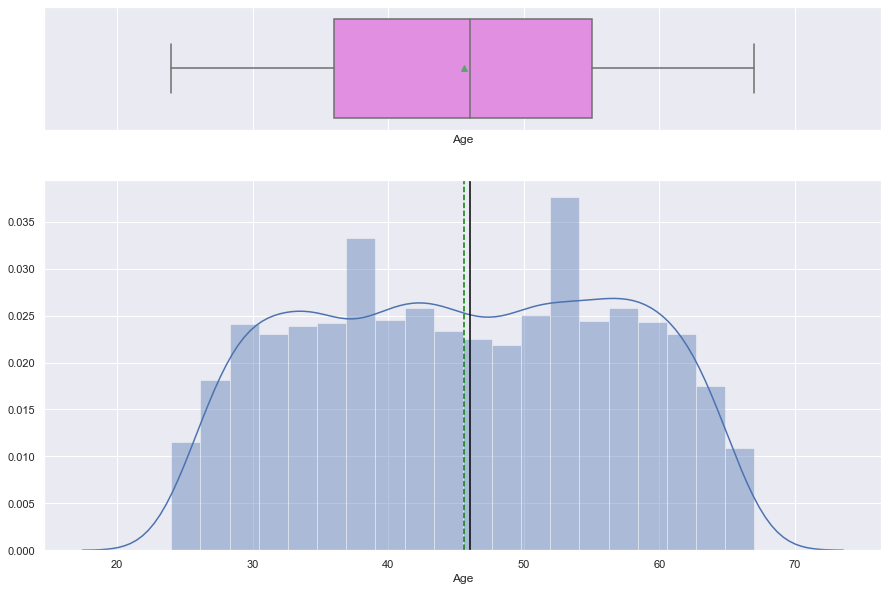

In [921]:
#see distribution for Age

histo_box(df['Age'])



####   OBSERVATIONS:
* Age does not have any outliers.
* All people are between 23 and 67 years of age.
* there is no sknewness in this variable

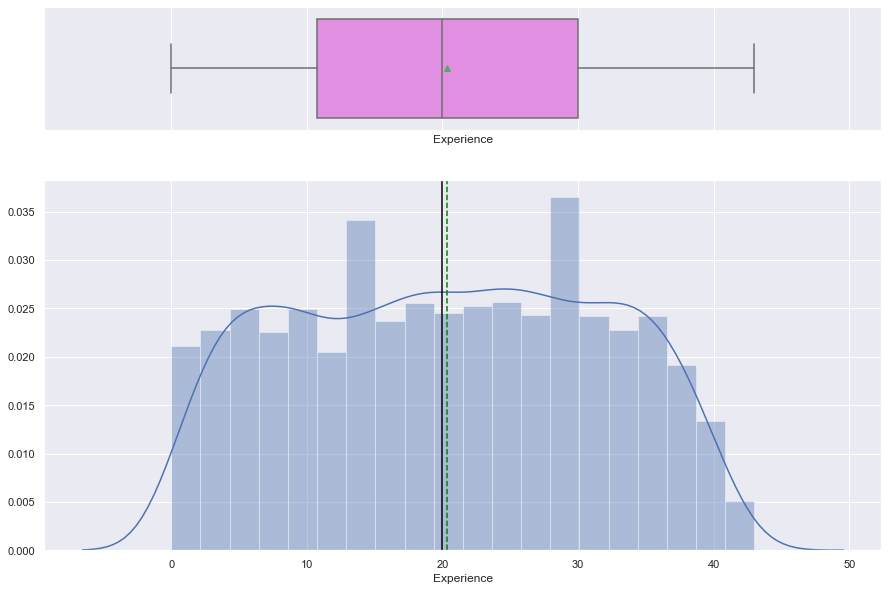

In [922]:
#see distribution for Experience

histo_box(df['Experience'])


####   OBSERVATIONS:
* Experience does not have any outliers.
* Experience should be inversely related with Age
* there is no skewness in this variable
* the range in the values of Experience is 43 which is very similar to the range in Age which is 44

In [923]:
df.describe()

Age  Experience      Income      ZIPCode       CCAvg    Mortgage
count 4948.000000 4948.000000 4948.000000  4948.000000 4948.000000 4948.000000
mean    45.557195   20.331043   73.814470 93168.503436    1.935926   56.634398
std     11.320735   11.311973   46.112596  1761.076366    1.747694  101.828885
min     24.000000    0.000000    8.000000 90005.000000    0.000000    0.000000
25%     36.000000   10.750000   39.000000 91911.000000    0.700000    0.000000
50%     46.000000   20.000000   64.000000 93437.000000    1.500000    0.000000
75%     55.000000   30.000000   98.000000 94608.000000    2.600000  101.000000
max     67.000000   43.000000  224.000000 96651.000000   10.000000  635.000000

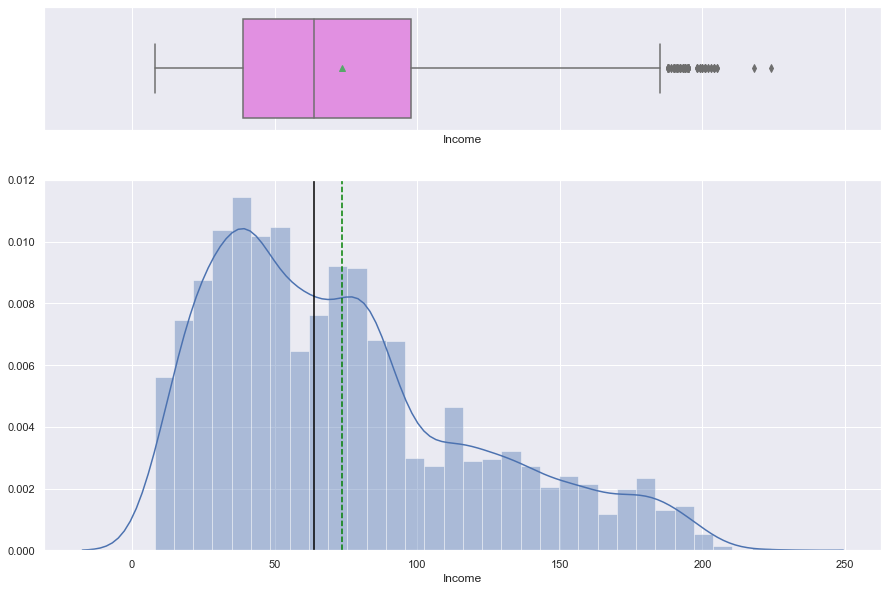

In [924]:
#see distribution for Income

histo_box(df['Income'])


####   OBSERVATIONS:
* Income is a little skewed on the right 
* there are a few outliers as some people have very high income
* average income is a little over 73k
* highest income is 224k
* lowest income is 8k, big discrepancy.

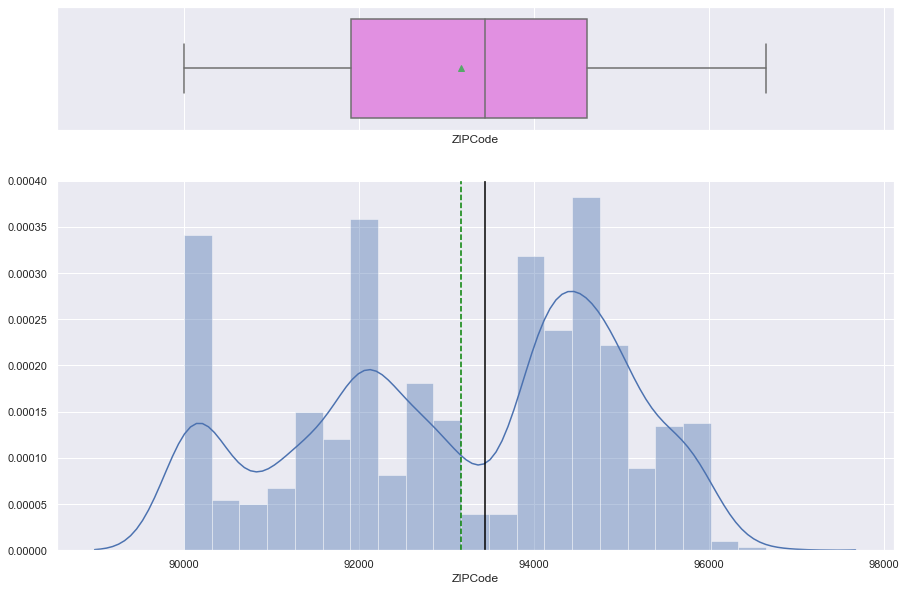

In [925]:
#see distribution for ZIPcode

histo_box(df['ZIPCode'])

####   OBSERVATIONS:
* all zipcodes seem to be from the same state.

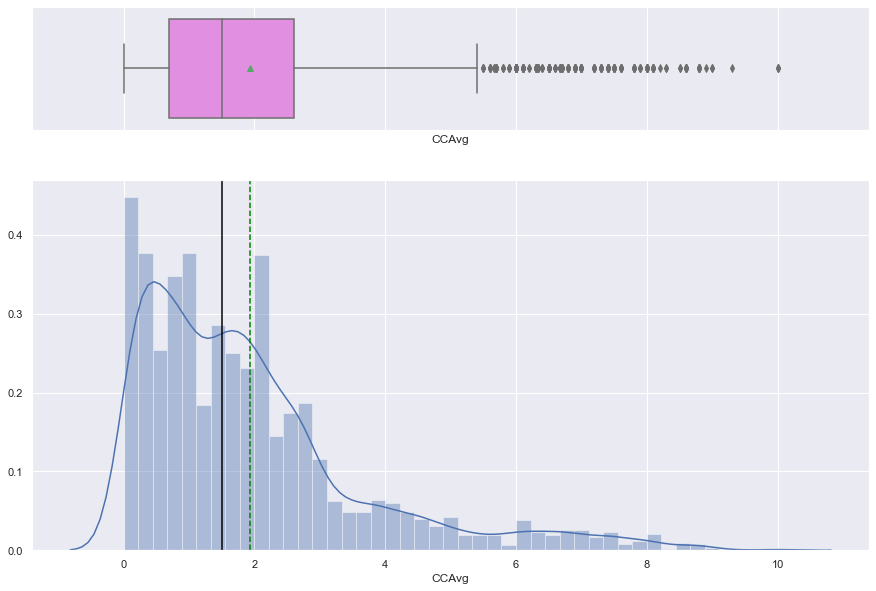

In [926]:
#see distribution for CCAvg

histo_box(df['CCAvg'])

In [927]:
df.groupby('CCAvg').size()

CCAvg
0.000000     106
0.100000     183
0.200000     203
0.300000     238
0.400000     177
            ... 
8.800000       9
8.900000       1
9.000000       2
9.300000       1
10.000000      3
Length: 108, dtype: int64

####   OBSERVATIONS:
* CCAvg is right skewed becasue some customers have very high spending on their credit cards
* 2% of customers don't have any spending on their credit cards


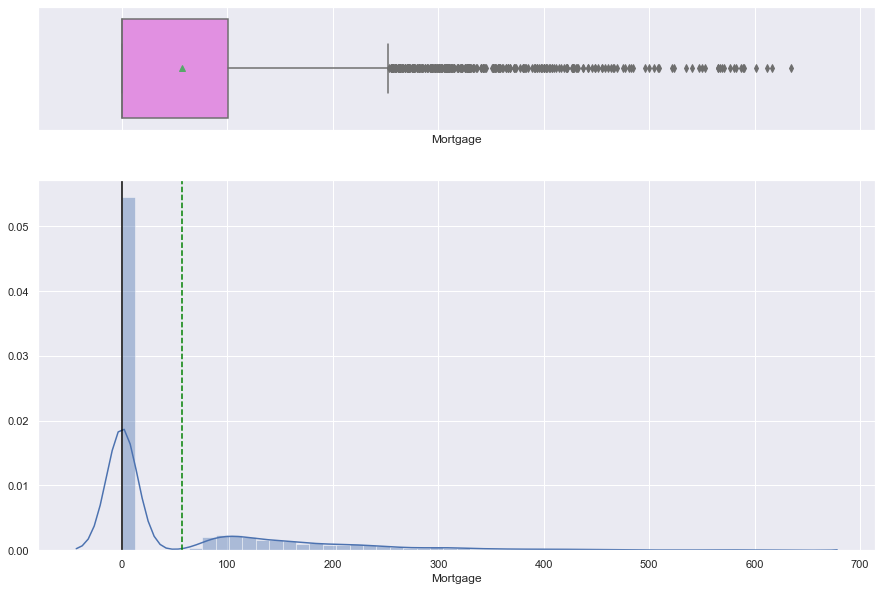

In [928]:
#see distribution for Mortgage

histo_box(df['Mortgage'])

####   OBSERVATIONS:
* Mortgage is heavily right skewed.
* skewness is because of customers who do not own their own home.
* almost 69% of customers do not have a Mortgage
* some customers have very high mortgage

#### ACTION: 
* will apply log transformation to Mortgage and CCAVg
* if that doesnt help with skewedness then will try putting the mortgage values in ranges <100, 100-200, 200-300, 300-400, >400
* can also just keep Mortgage a boolean, whether someone has mortgage or not, since more than half dont have any mortgage, the mortgage amount may prove insignificant vs whether the customer has mortgage or not

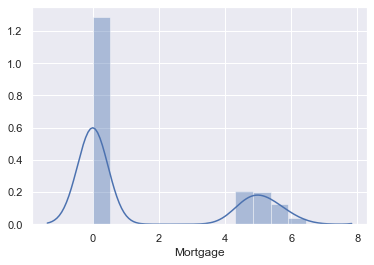

In [929]:
# apply different transformations to Mortgage to pick the best one

# we can just add 1 and then apply log because $1 is a very small insignificant amount

sns.distplot(np.log(df['Mortgage']+1)) 
plt.show()
 

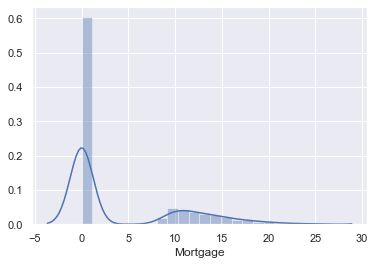

In [930]:
# lets try sqrt

sns.distplot(np.sqrt(df['Mortgage']))

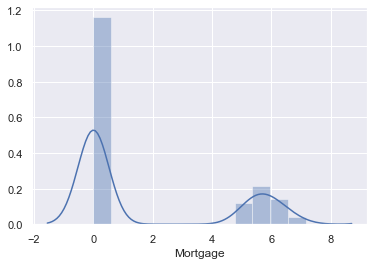

In [931]:
# try arcsinh

sns.distplot(np.arcsinh(df['Mortgage']))

In [932]:
# let's try putting Mortgage values in ranges

df['binned_Mortgage'] = pd.cut(df['Mortgage'], [-np.inf,99,199,299,399, np.inf], labels = ["Under $100k","$100k-$199k","$200k-$299k","$300k-$399k","Over $400k"])

df['binned_Mortgage'].value_counts(dropna = False)


Under $100k    3688
$100k-$199k     764
$200k-$299k     296
$300k-$399k     124
Over $400k       76
Name: binned_Mortgage, dtype: int64

In [933]:
df.describe(include ='all')

Age  Experience      Income      ZIPCode      Family  \
count  4948.000000 4948.000000 4948.000000  4948.000000 4948.000000   
unique         nan         nan         nan          nan    4.000000   
top            nan         nan         nan          nan    1.000000   
freq           nan         nan         nan          nan 1470.000000   
mean     45.557195   20.331043   73.814470 93168.503436         nan   
std      11.320735   11.311973   46.112596  1761.076366         nan   
min      24.000000    0.000000    8.000000 90005.000000         nan   
25%      36.000000   10.750000   39.000000 91911.000000         nan   
50%      46.000000   20.000000   64.000000 93437.000000         nan   
75%      55.000000   30.000000   98.000000 94608.000000         nan   
max      67.000000   43.000000  224.000000 96651.000000         nan   

             CCAvg   Education    Mortgage  Personal_Loan  Securities_Account  \
count  4948.000000 4948.000000 4948.000000    4948.000000         4948.000000   
unique         nan    3.000000         nan       2.000000            2.000000   
top            nan    1.000000         nan       0.000000            0.000000   
freq           nan 2080.000000         nan    4468.000000         4432.000000   
mean      1.935926         nan   56.634398            nan                 nan   
std       1.747694         nan  101.828885            nan                 nan   
min       0.000000         nan    0.000000            nan                 nan   
25%       0.700000         nan    0.000000            nan                 nan   
50%       1.500000         nan    0.000000            nan                 nan   
75%       2.600000         nan  101.000000            nan                 nan   
max      10.000000         nan  635.000000            nan                 nan   

        CD_Account      Online  CreditCard binned_Mortgage  
count  4948.000000 4948.000000 4948.000000            4948  
unique    2.000000    2.000000    2.000000               5  
top       0.000000    1.000000    0.000000     Under $100k  
freq   4646.000000 2954.000000 3493.000000            3688  
mean           nan         nan         nan             NaN  
std            nan         nan         nan             NaN  
min            nan         nan         nan             NaN  
25%            nan         nan         nan             NaN  
50%            nan         nan         nan             NaN  
75%            nan         nan         nan             NaN  
max            nan         nan         nan             NaN

In [934]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4948 non-null   int64   
 1   Experience          4948 non-null   int64   
 2   Income              4948 non-null   int64   
 3   ZIPCode             4948 non-null   int64   
 4   Family              4948 non-null   category
 5   CCAvg               4948 non-null   float64 
 6   Education           4948 non-null   category
 7   Mortgage            4948 non-null   int64   
 8   Personal_Loan       4948 non-null   category
 9   Securities_Account  4948 non-null   category
 10  CD_Account          4948 non-null   category
 11  Online              4948 non-null   category
 12  CreditCard          4948 non-null   category
 13  binned_Mortgage     4948 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 310.2 KB


## EDA Categorical Data

### Univariate Analysis - Categorical

In [935]:
#function to plot the percentages on the barplots.


def percentage_barplot(ax, feature):
    
   
    total = len(feature)  #length of column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # calculate percentage
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x,y), size = 12)
    plt.show() #show the plot

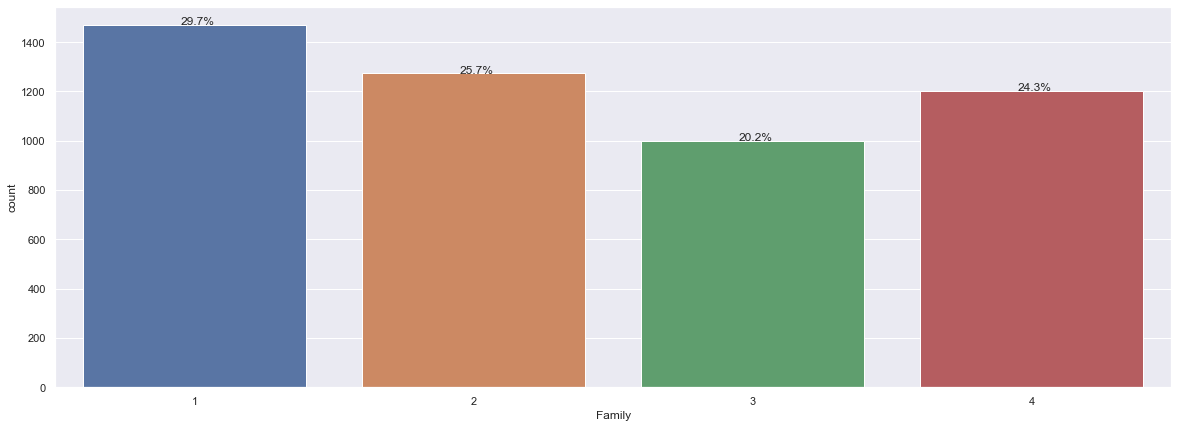

In [936]:

#Family

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Family'])
percentage_barplot(ax,df['Family'])





###   OBSERVATIONS:
* ALmost 30% of customers have a Family of 1, that is they are alone


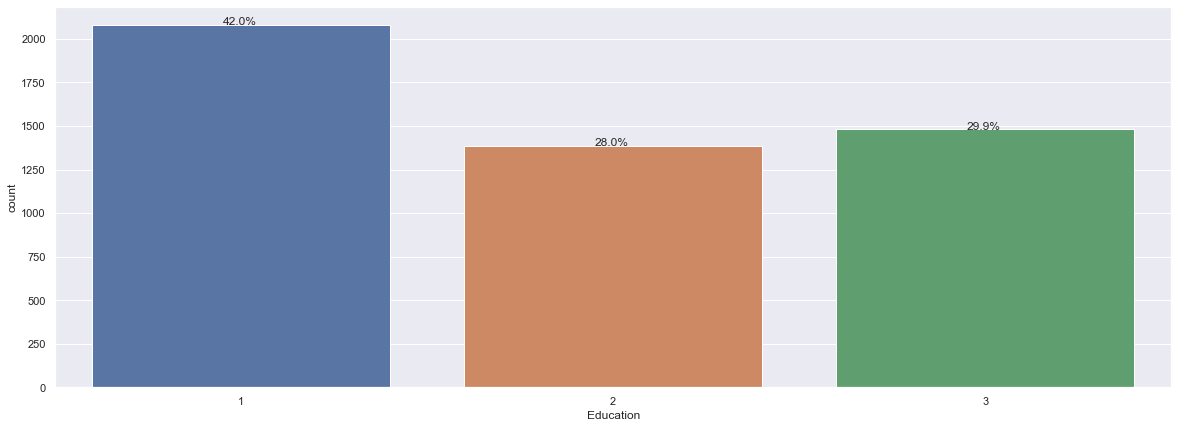

In [937]:

#Education

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Education'])
percentage_barplot(ax,df['Education'])

###   OBSERVATIONS:
* 42% of customers have an undergrdaduate degree
* Graduate and Advanced degrees have almost the same occurence.

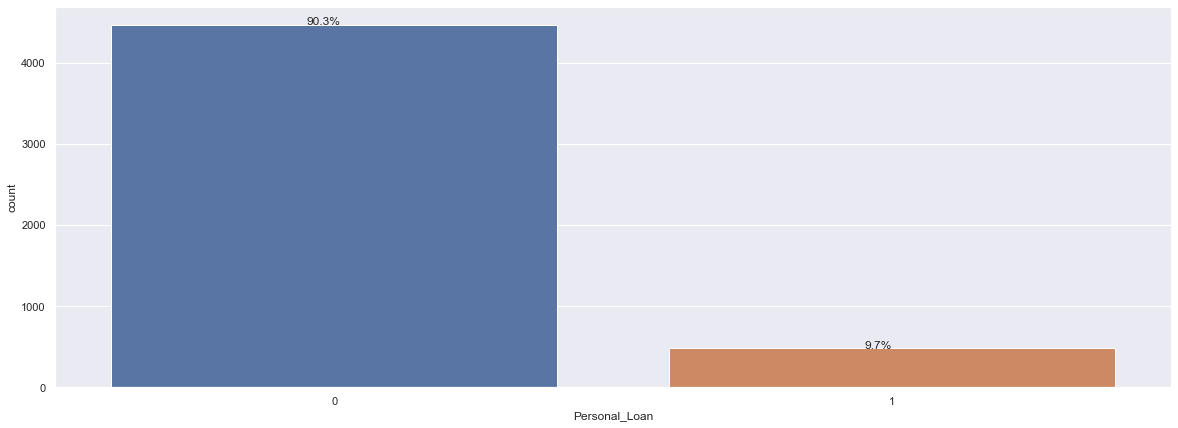

In [938]:
#Personal_Loan

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Personal_Loan'])
percentage_barplot(ax,df['Personal_Loan'])

###   OBSERVATIONS:
* only 9.7% of customers get Personal Loans, we want to see how we can improve this number

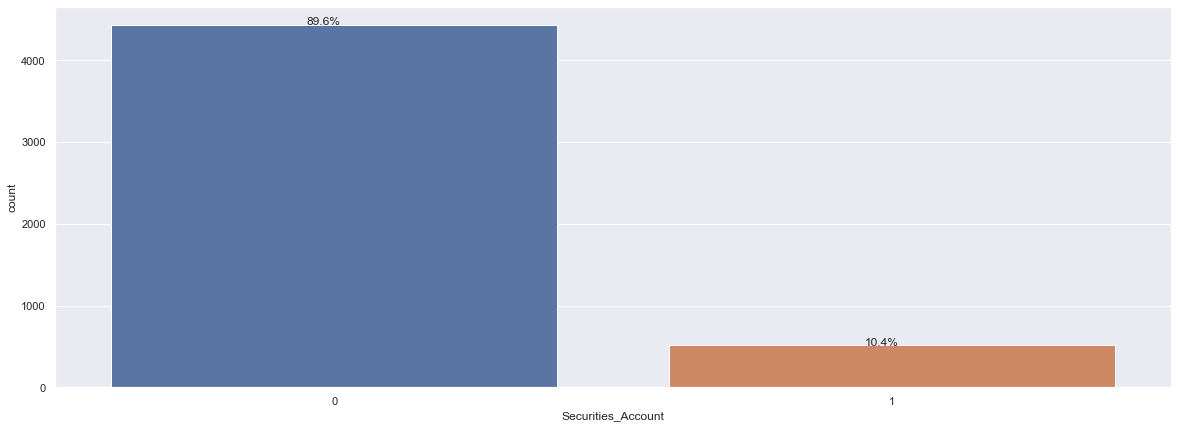

In [939]:
#Securities_Account

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Securities_Account'])
percentage_barplot(ax,df['Securities_Account'])

###   OBSERVATIONS:
* only 10.4% of customers have securities account with the bank.
* there seems to be a high correlation with Personal_Loan variable

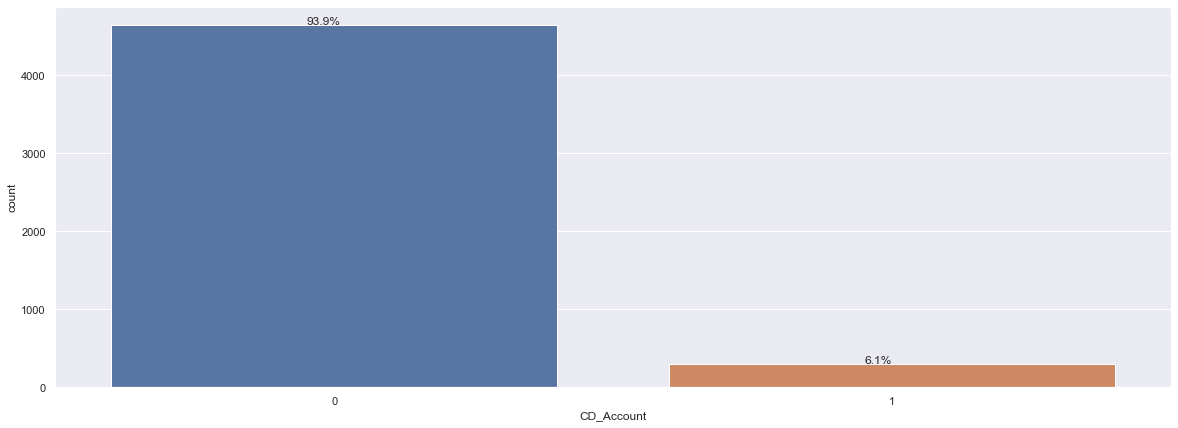

In [940]:
#CD_Account

plt.figure(figsize = (20,7))
ax = sns.countplot(df['CD_Account'])
percentage_barplot(ax,df['CD_Account'])

###   OBSERVATIONS:
* only 6.1% of customers have CD account with the bank.
* there seems to be a high correlation with Personal_Loan and Securities_account variables

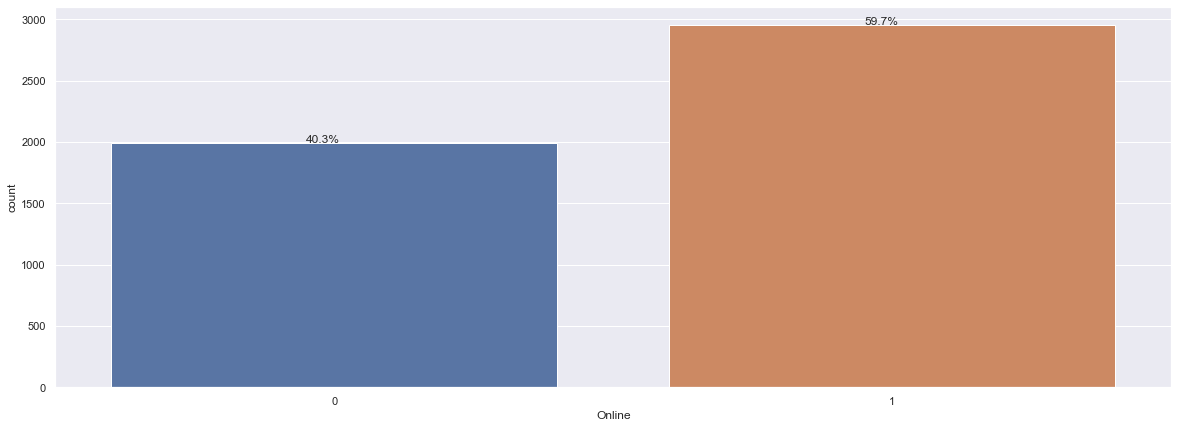

In [941]:
#Online

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Online'])
percentage_barplot(ax,df['Online'])

###   OBSERVATIONS:
* almost 60% of customers use online banking.

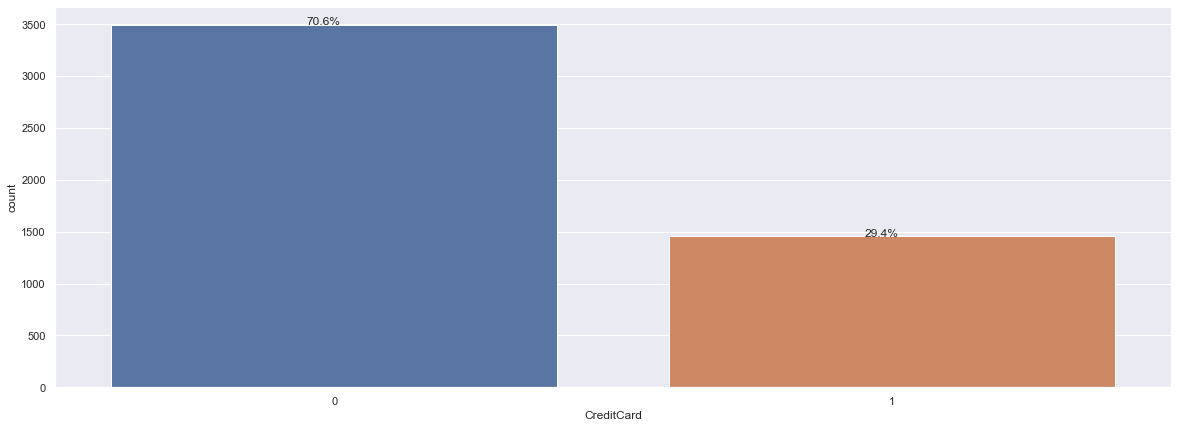

In [942]:
#CreditCard

plt.figure(figsize = (20,7))
ax = sns.countplot(df['CreditCard'])
percentage_barplot(ax,df['CreditCard'])

###  OBSERVATIONS:
* almost 30% of customers own a credit card issued by the bank

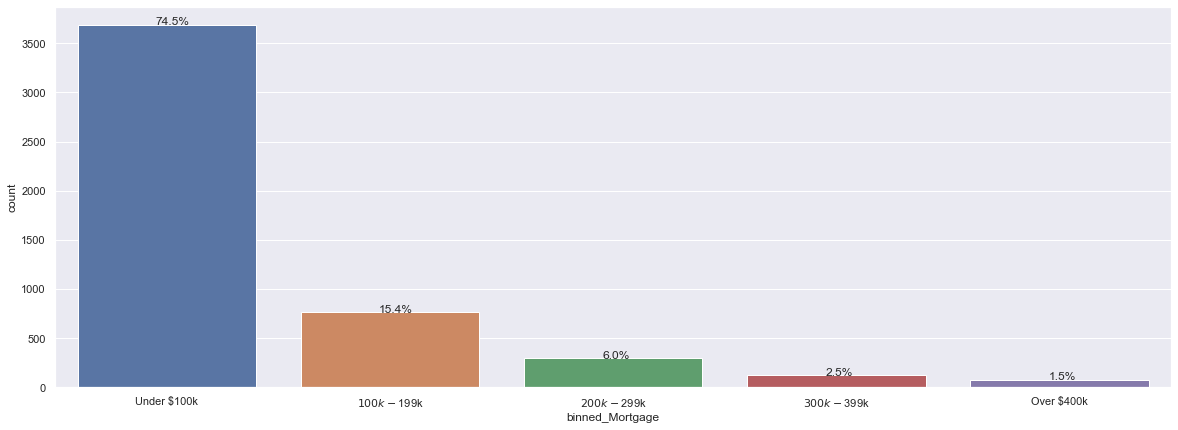

In [943]:
#binned_Mortgage

plt.figure(figsize = (20,7))
ax = sns.countplot(df['binned_Mortgage'])
percentage_barplot(ax,df['binned_Mortgage'])

###   OBSERVATIONS:
* almost 75% of customers do not have a mortgage
* the most common mortgage among the customers is in the $100k-199k range

### QUESTION: what if we treat Mortgage as a boolean, either customers have a mortgage or they don't?

## EDA BiVariate analysis

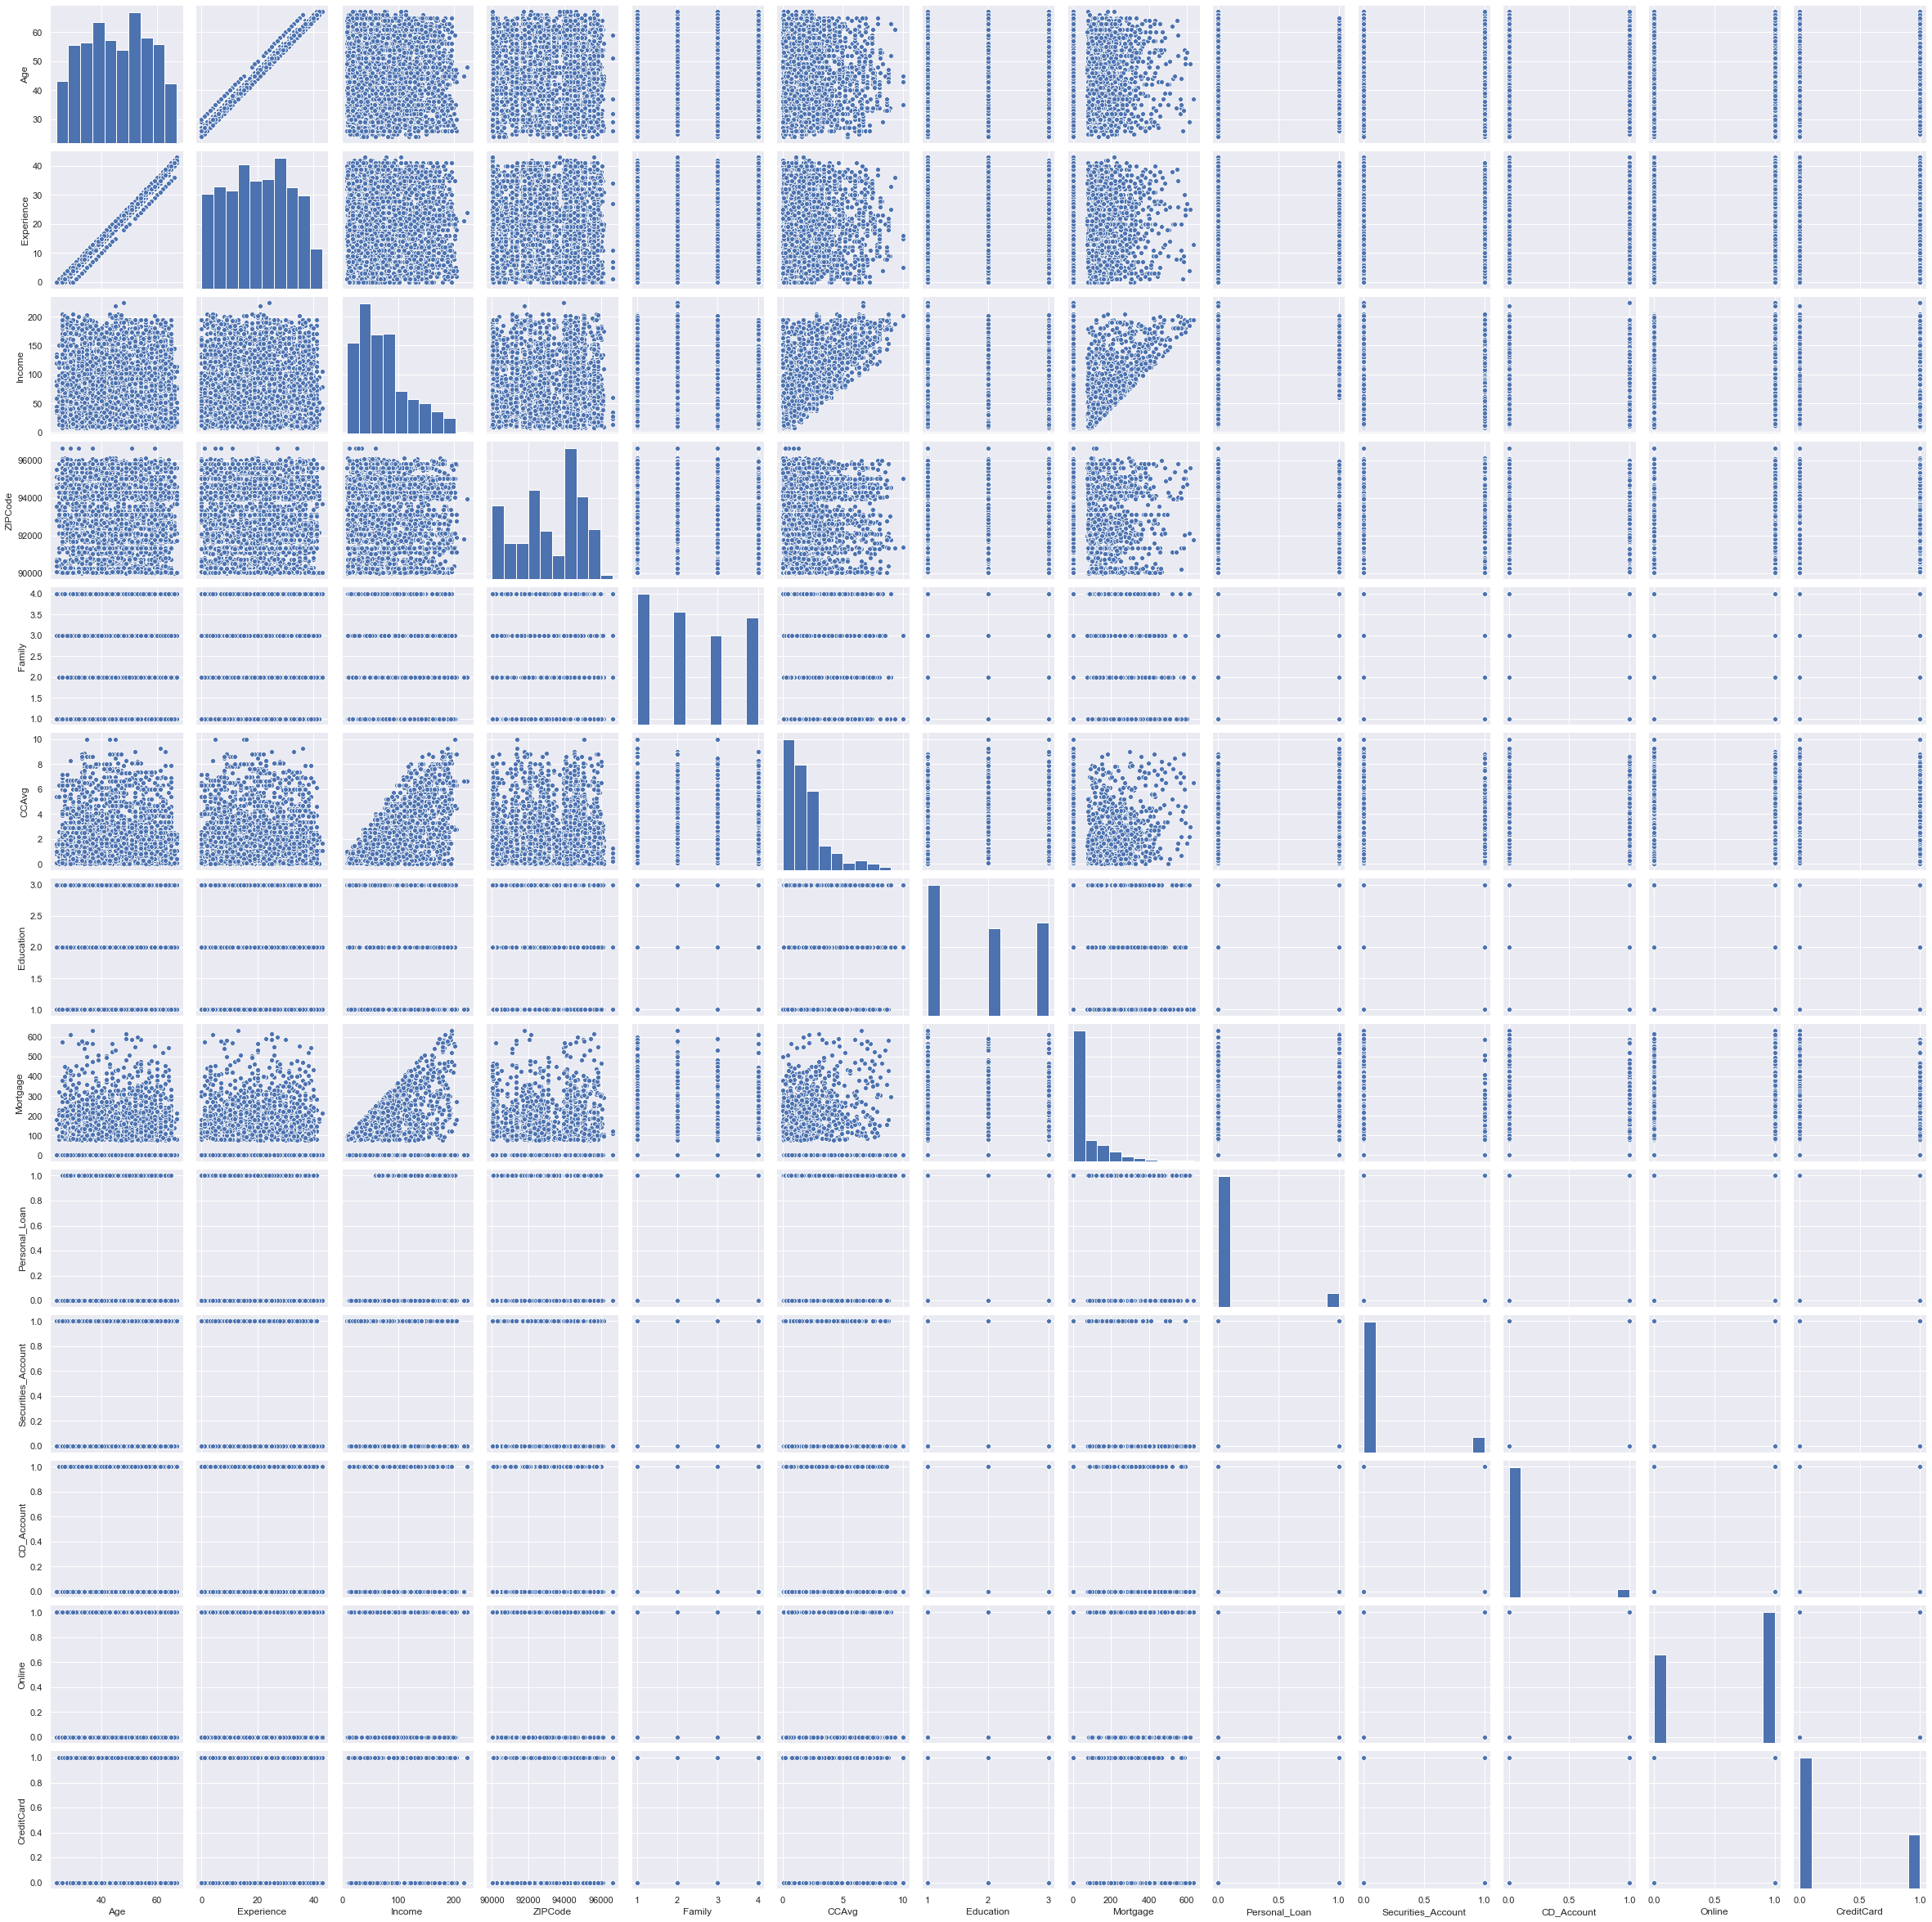

In [944]:

sns.pairplot(data=df)
plt.show()

### CORREALTION MATRIX OF NUMERICAL VARIABLES

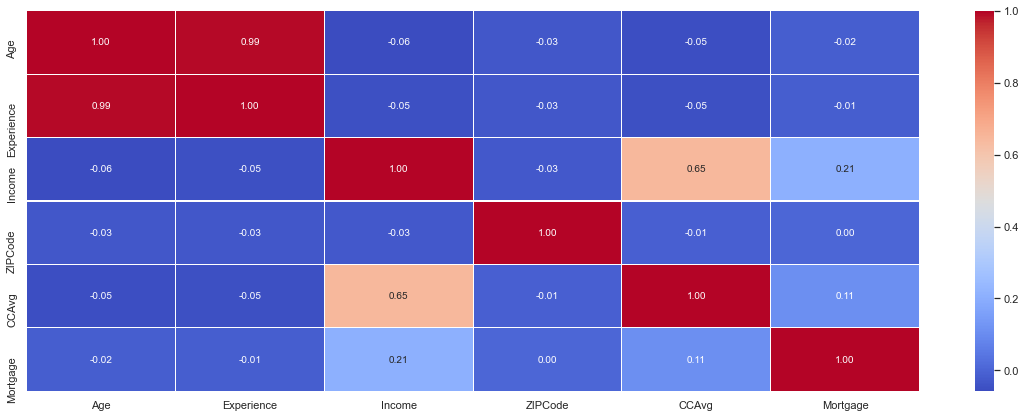

In [945]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), annot=True, linewidths = 0.05, fmt = '.2f', cmap="coolwarm") 


####   OBSERVATIONS:
* Age and Experience have avery high correlation, almost 1, which is to be expected as older people have more professional experience
* Income and CCAvg also have a high correlation of 0.65
* Mortgage and Income have some correlation at 0.21


In [946]:
df.corr()

Age  Experience    Income   ZIPCode     CCAvg  Mortgage
Age         1.000000    0.994101 -0.058006 -0.030790 -0.050879 -0.015184
Experience  0.994101    1.000000 -0.049245 -0.030525 -0.048939 -0.013459
Income     -0.058006   -0.049245  1.000000 -0.029076  0.646178  0.206921
ZIPCode    -0.030790   -0.030525 -0.029076  1.000000 -0.010614  0.004632
CCAvg      -0.050879   -0.048939  0.646178 -0.010614  1.000000  0.109905
Mortgage   -0.015184   -0.013459  0.206921  0.004632  0.109905  1.000000

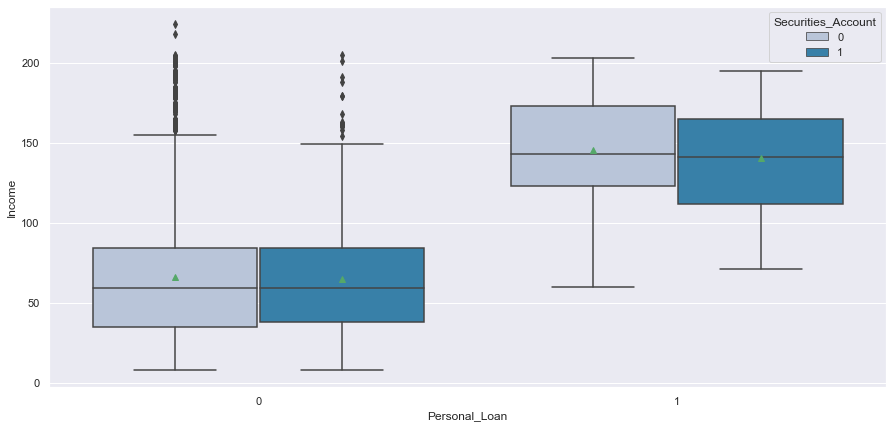

In [947]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Personal_Loan"],df["Income"],hue = df["Securities_Account"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* the average Income of customer who do not take a personal loan is around 62k
* some people with very high income, over 150k dont get a personal loan either
* people who take personal loans have income ranging from around 115 to 175.
* people with securities accounts take personal loans at a lower income than those with no securities accounts. maybe the ones with securities are investing more money.


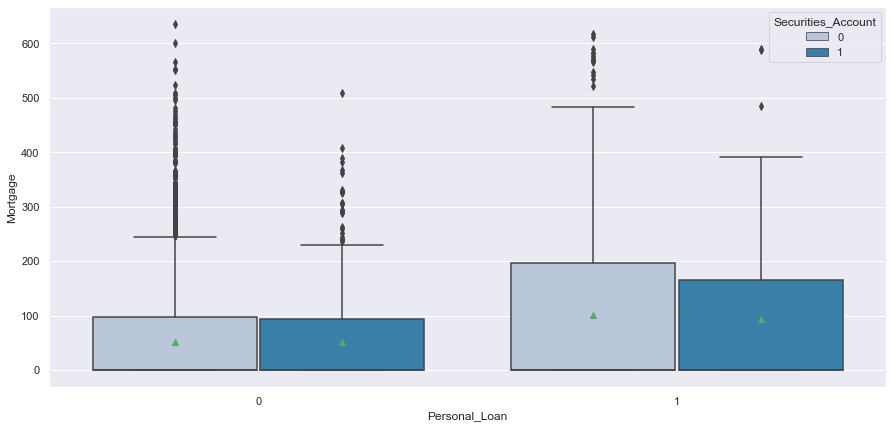

In [948]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Personal_Loan"],df["Mortgage"],hue = df["Securities_Account"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* average mortgage of customers who take personal loans is higher than that of those who do not take personal loans 
* customers with mortgages over about 215k usually dont get a perosnal loan


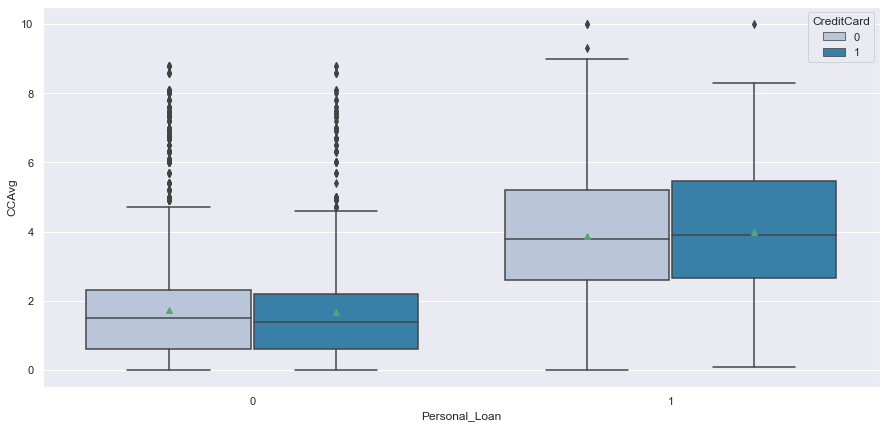

In [949]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Personal_Loan"],df["CCAvg"],hue = df["CreditCard"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* customers with higher average monthly spending on credit cards take more personal loans.
* there are a lot of outliers in customers who dont have a personal loan and have higher than 4.5k spending on credit cards. these could e potentials for personal loan. 
* those who have personal loans have very few outliers
* having a credit card does not seem to be increasing the chances of customers taking a personal loan

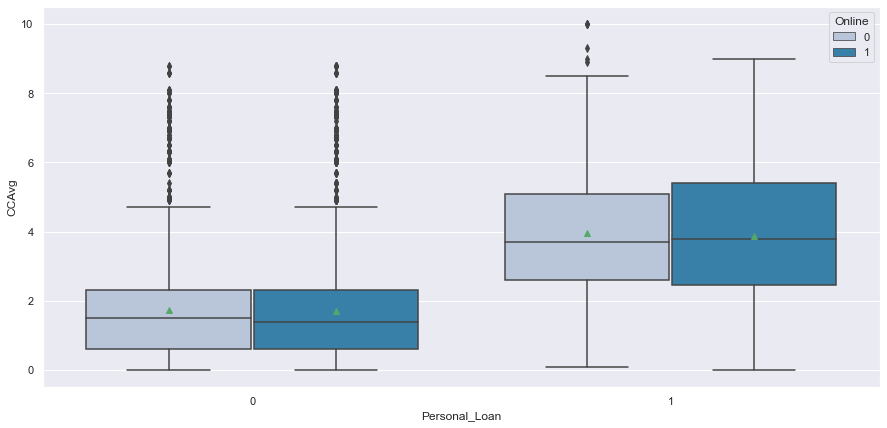

In [950]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Personal_Loan"],df["CCAvg"],hue = df["Online"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* customers with higher average monthly spending on credit cards take more personal loans.
* there are a lot of outliers in customers who dont have a personal loan and have higher than 4.5k spending on credit cards. these could e potentials for personal loan. 
* those who have personal loans have very few outliers

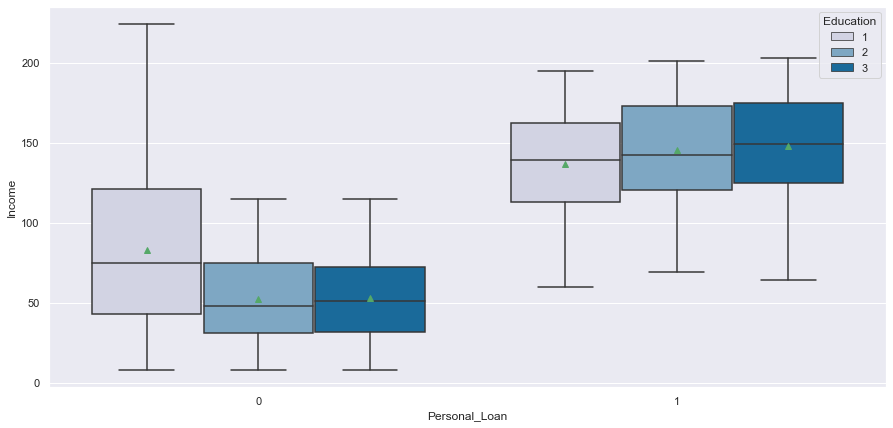

In [951]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Personal_Loan"],df["Income"],hue = df["Education"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* customers who take personal loans usually have income higher than about 120k
* people with level 2 and 3 education who dont take personal loans have low incomes.

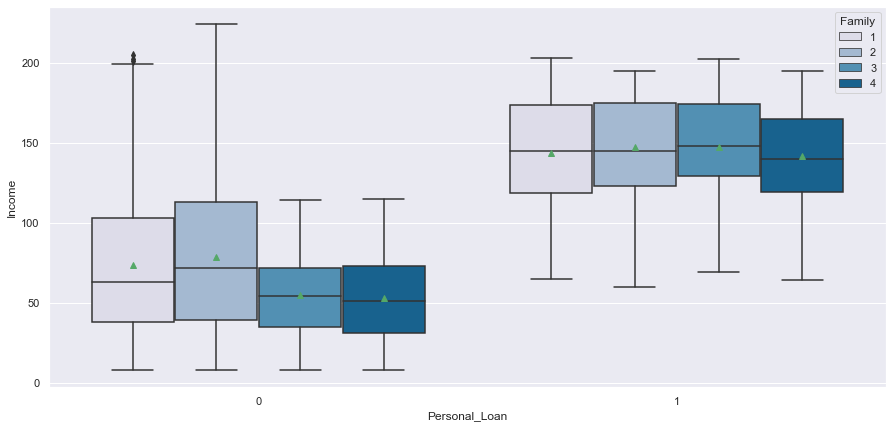

In [952]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Personal_Loan"],df["Income"],hue = df["Family"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* customers who take personal loans usually have income higher than about 120k


### Mortgage vs Income vs Personal_Loan

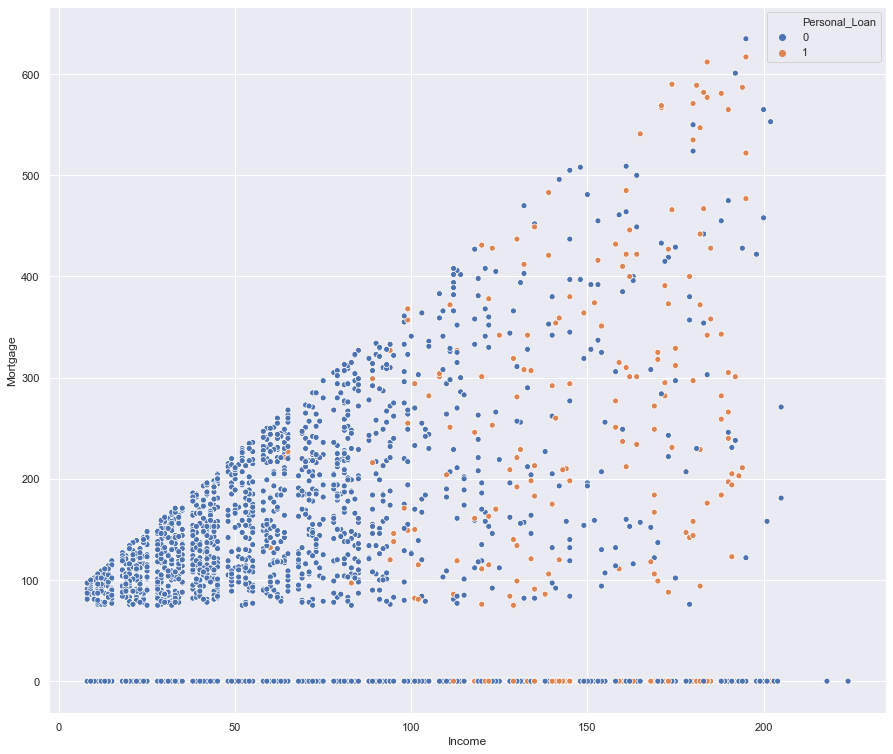

In [953]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Mortgage', x='Income', hue='Personal_Loan', data=df);

####   OBSERVATIONS:
* customers with lower income and lower Mortgages do not take Personal_Loans

### Mortgage vs Income vs Education

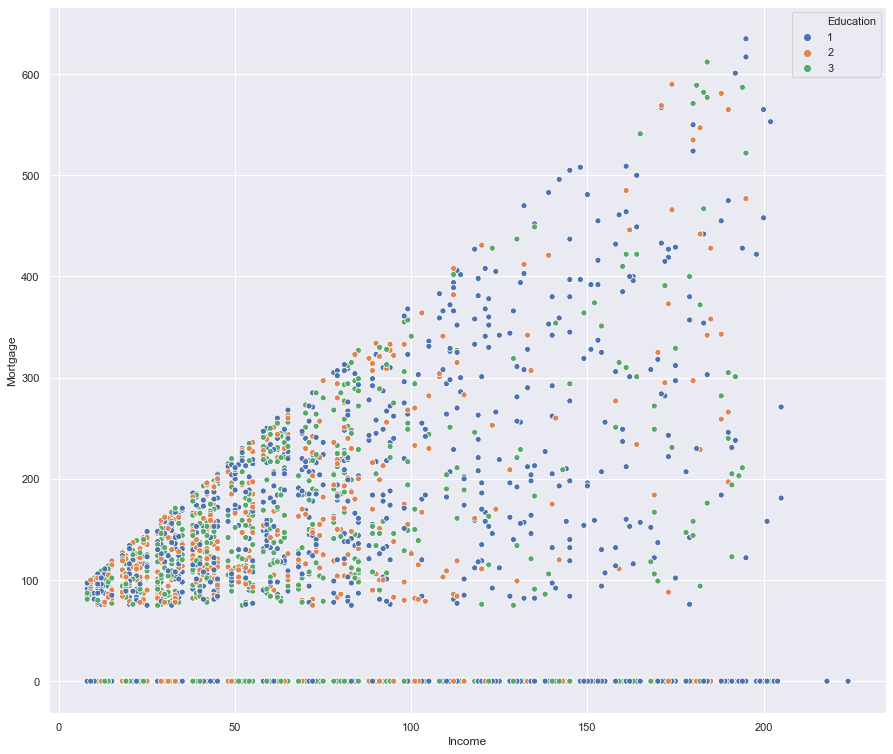

In [954]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Mortgage', x='Income', hue='Education', data=df);

####   OBSERVATIONS:
* Surprisingly a lot of customers with higher levels of education have lower Income and Mortgages.

### Age vs Experience vs Personal_Loan

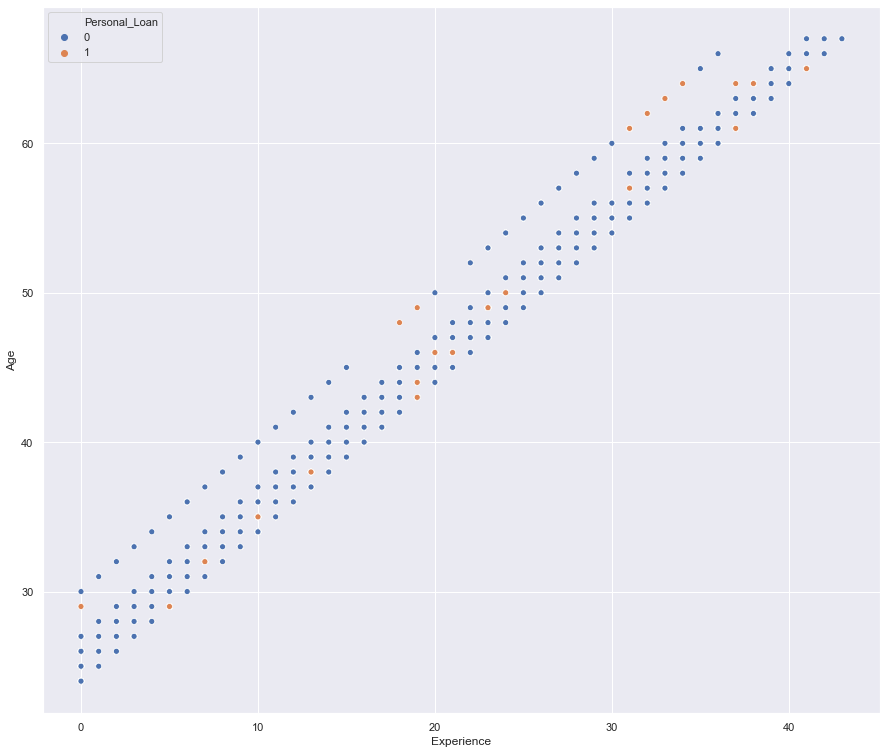

In [955]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Age', x='Experience', hue='Personal_Loan', data=df);

####   OBSERVATIONS:
* Experience increases linearly with Age

### Income vs CCAvg vs Personal_Loan

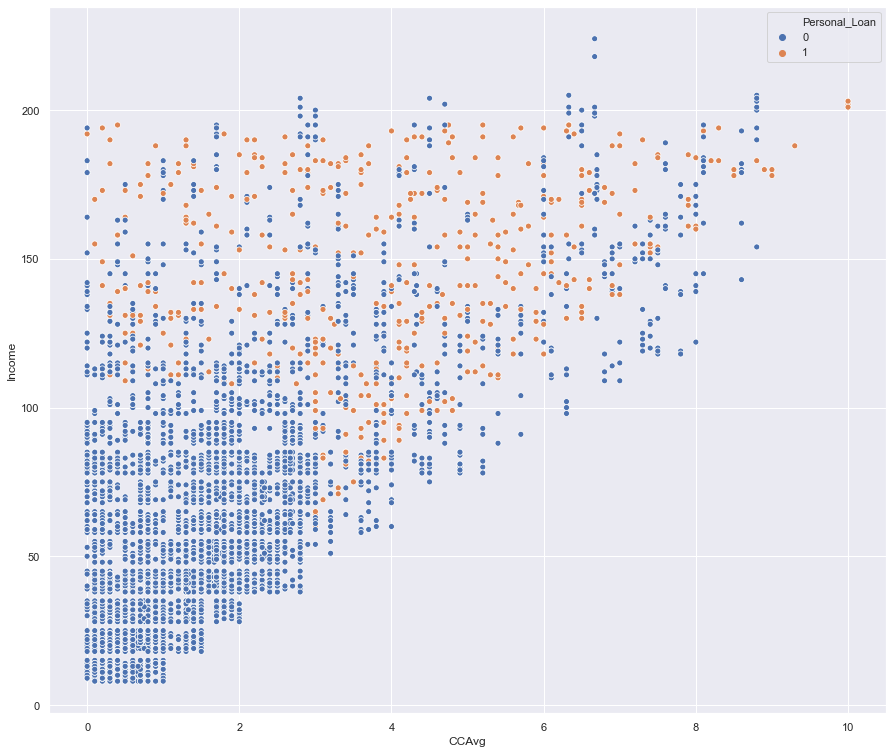

In [956]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Income', x='CCAvg', hue='Personal_Loan', data=df);

####   OBSERVATIONS:
* Customers with lower Income have lower average credit card expenses.

### Income vs ZIPCode vs Personal_Loan

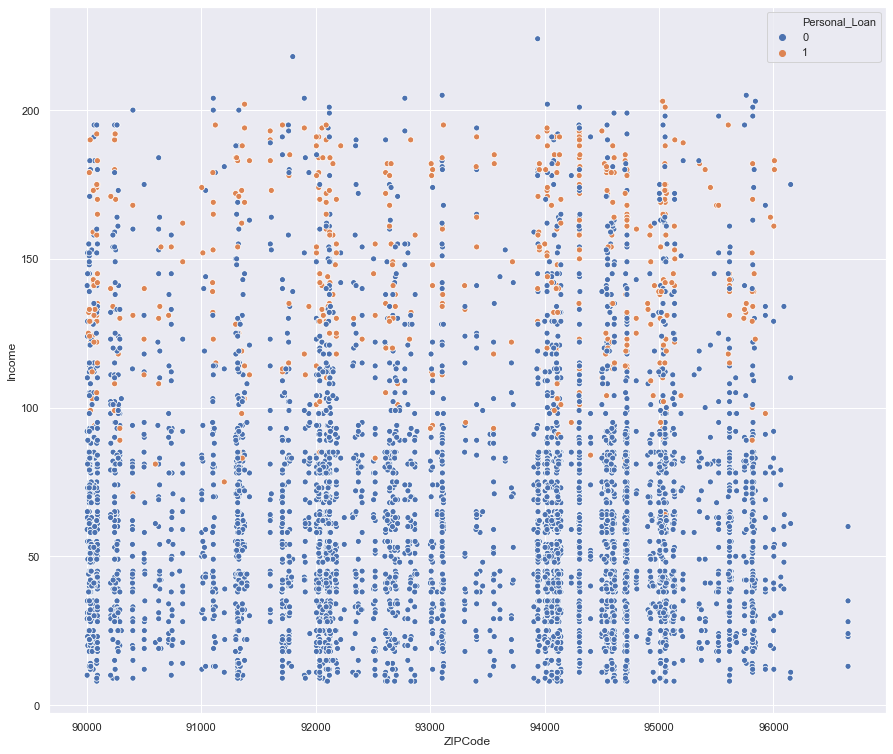

In [957]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Income', x='ZIPCode', hue='Personal_Loan', data=df);

####   OBSERVATIONS:
* Most of the customers with Personal_Loans have an income greater than 75k
* Number of Personal_Loans is evenly distributed over the Zipcodes, no area has more loans than other.

#### PLOT BOXPLOTS OF ALL NUMERIC VARIABLES IN ONE PLOT TO SEE OUTLIERS PRESENT

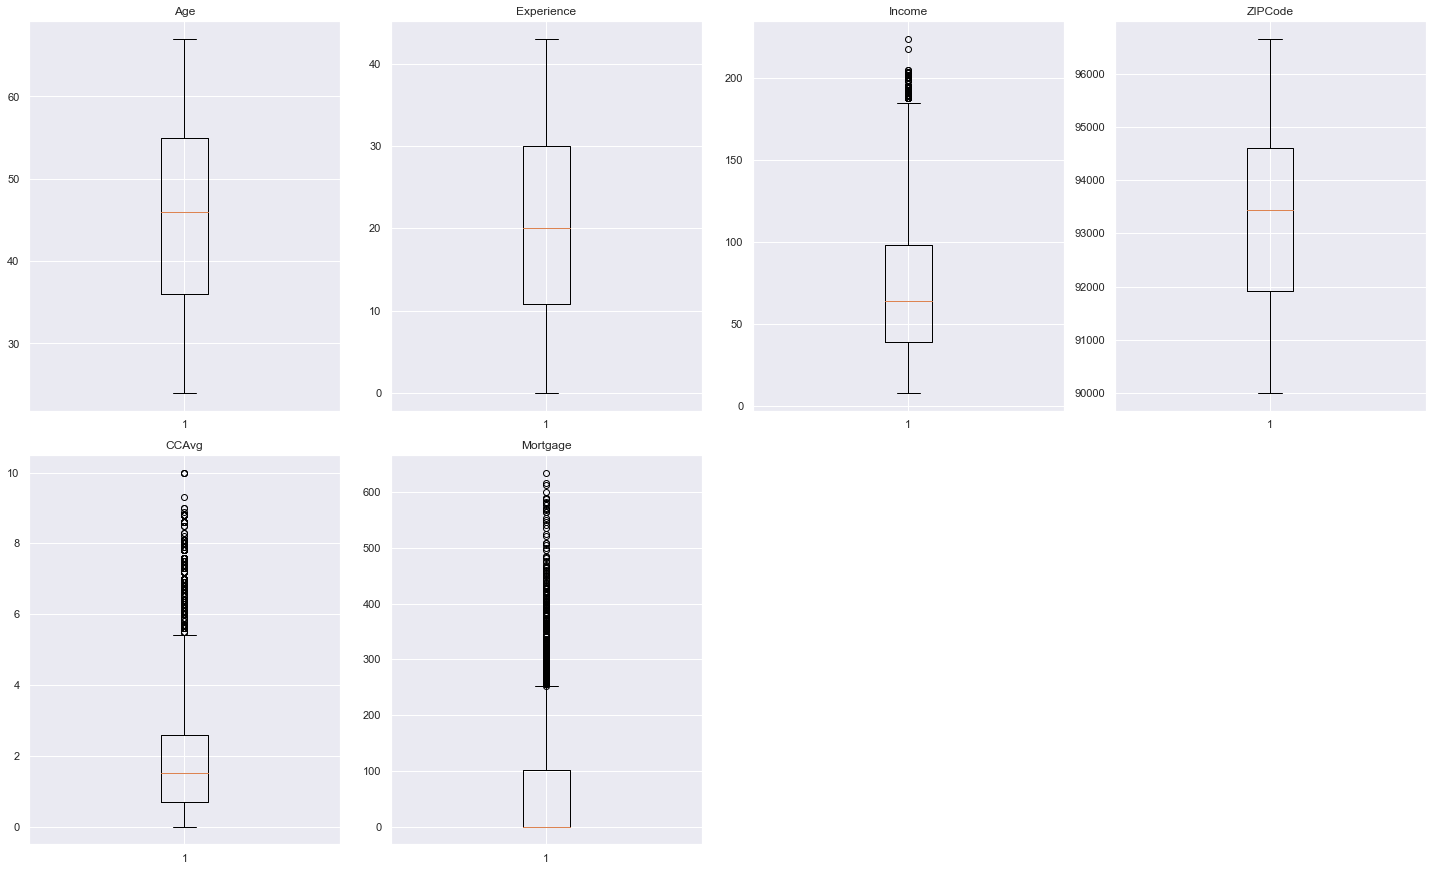

In [958]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist() #all numeric columns

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

####   OBSERVATIONS:
* Age, ZipCode and Experience have no outliers
* Income, CCAvg and Mortgage have upper outliers

## TREAT OUTLIERS

In [959]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):

    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    lower_whisker = Q1 - 1.5*IQR 
    upper_whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker) # all the values samller than Lower_Whisker will be given value of Lower_whisker 
                                                            # and all the values above upper_whishker will be given value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
   
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [960]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist() # get list of numerical columns
df = treat_outliers_all(df,numerical_col)

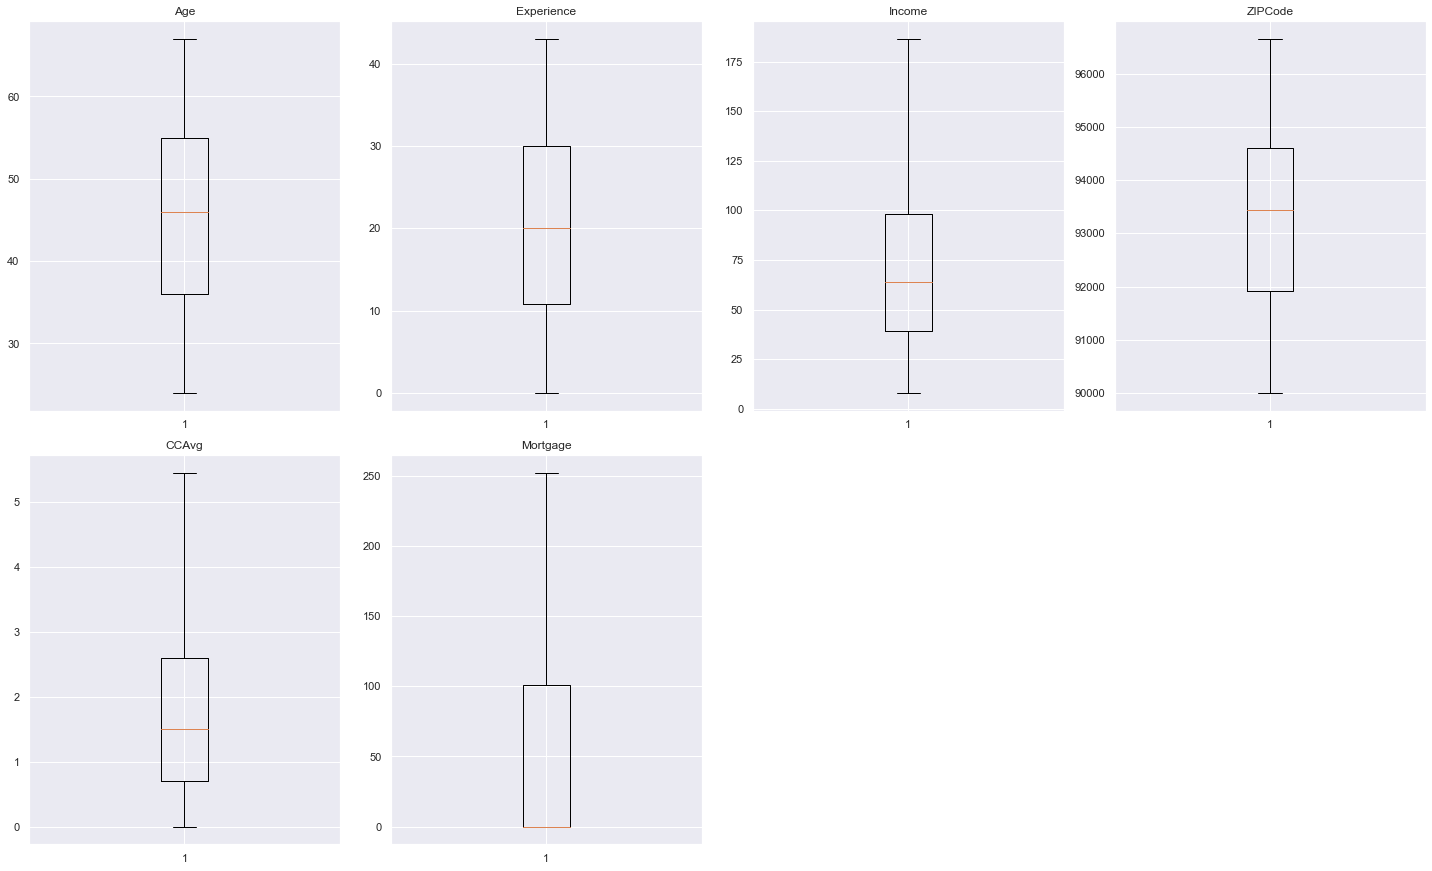

In [961]:
# see all boxplots to see if outliers are still present
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

#### Outliers have been treated

In [962]:
df.head()

Age  Experience     Income  ZIPCode Family    CCAvg Education  Mortgage  \
0   25           1  49.000000    91107      4 1.600000         1  0.000000   
1   45          19  34.000000    90089      3 1.500000         1  0.000000   
2   39          15  11.000000    94720      1 1.000000         1  0.000000   
3   35           9 100.000000    94112      1 2.700000         2  0.000000   
4   35           8  45.000000    91330      4 1.000000         2  0.000000   

  Personal_Loan Securities_Account CD_Account Online CreditCard  \
0             0                  1          0      0          0   
1             0                  1          0      0          0   
2             0                  0          0      0          0   
3             0                  0          0      0          0   
4             0                  0          0      0          1   

  binned_Mortgage  
0     Under $100k  
1     Under $100k  
2     Under $100k  
3     Under $100k  
4     Under $100k

In [963]:
#look at all the categorical variables

df.describe(exclude = [np.number])

Family  Education  Personal_Loan  Securities_Account  CD_Account  \
count     4948       4948           4948                4948        4948   
unique       4          3              2                   2           2   
top          1          1              0                   0           0   
freq      1470       2080           4468                4432        4646   

        Online  CreditCard binned_Mortgage  
count     4948        4948            4948  
unique       2           2               5  
top          1           0     Under $100k  
freq      2954        3493            3688

#### Look at unique values of the categorical variables

In [964]:
# check unique values of all categorical data, will see any nan also if such values exist in some column

print(df['Family'].unique())
print(df['Education'].unique()) 
print(df['Personal_Loan'].unique())
print(df['Securities_Account'].unique())
print(df['CD_Account'].unique())
print(df['Online'].unique())
print(df['CreditCard'].unique())
print(df['binned_Mortgage'].unique())

[4, 3, 1, 2]
Categories (4, int64): [4, 3, 1, 2]
[1, 2, 3]
Categories (3, int64): [1, 2, 3]
[0, 1]
Categories (2, int64): [0, 1]
[1, 0]
Categories (2, int64): [1, 0]
[0, 1]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]
[Under $100k, $100k-$199k, $200k-$299k, Over $400k, $300k-$399k]
Categories (5, object): [Under $100k < $100k-$199k < $200k-$299k < $300k-$399k < Over $400k]


### MODEL BUILDING

### Define X and y variables

In [965]:
#Define X and y variables
X = df.drop(['Personal_Loan','Mortgage'], axis=1)
Y = df[['Personal_Loan']]

print(X.head())
print(Y.head())

   Age  Experience     Income  ZIPCode Family    CCAvg Education  \
0   25           1  49.000000    91107      4 1.600000         1   
1   45          19  34.000000    90089      3 1.500000         1   
2   39          15  11.000000    94720      1 1.000000         1   
3   35           9 100.000000    94112      1 2.700000         2   
4   35           8  45.000000    91330      4 1.000000         2   

  Securities_Account CD_Account Online CreditCard binned_Mortgage  
0                  1          0      0          0     Under $100k  
1                  1          0      0          0     Under $100k  
2                  0          0      0          0     Under $100k  
3                  0          0      0          0     Under $100k  
4                  0          0      0          1     Under $100k  
  Personal_Loan
0             0
1             0
2             0
3             0
4             0


In [966]:
#check shape of X and y
print(X.shape)
print(Y.shape)

(4948, 12)
(4948, 1)


### CREATE DUMMY VARIABLES 


In [967]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y, test_size=0.30)
#print(X.head())
Y.head()
X.shape
X_train.shape
#X_test.shape


(3463, 18)

## Logistic Regression

In [968]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

### Model Coefficients

In [969]:
coef_df = pd.DataFrame(logreg.coef_)
coef_df['intercept'] = logreg.intercept_
print(coef_df)

         0         1        2         3        4         5        6        7  \
0 0.052413 -0.045918 0.065201 -0.000072 0.410385 -0.265282 2.109988 1.686179   

         8        9        10       11        12        13       14       15  \
0 3.895924 4.195301 -0.808946 3.697230 -0.700250 -1.099821 0.244420 0.121820   

        16       17  intercept  
0 0.855563 0.462315  -8.475827  


### Model Performances

#### Model Score

In [970]:
model_score = logreg.score(X_test, y_test)
print(model_score)

0.9616161616161616


#### Observation:
* Model predicted correctly 96 % of the time

### Prediction on Train

#### Confusion Matrix on train set

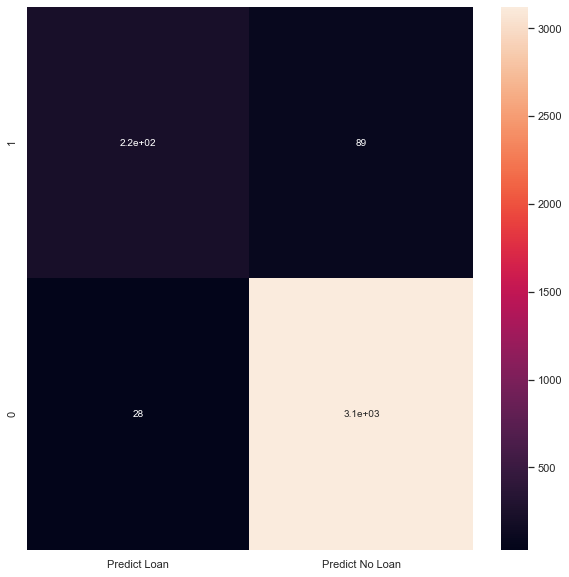

In [971]:
#Predict for train set
y_train_predict = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix

cm=metrics.confusion_matrix(y_train, y_train_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Loan","Predict No Loan"]])

plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

#### Notes:
* TP = 230 = 34.85% - Correctly predicted that the customers have a Personal Loan
* FP = 34 = 5.15% -  incorrectly predicted that the customers have personal loan
* TN = 310 = 46.97% - Correctly predicted that the customers dont have a Personal Loan
* FN = 86 = 13.03% - incorrectly predicted that the customers dont have personal loan

#### Calculate the metrics

In [972]:
#Accuracy
accuracy = (230+310)/(230+34+310+86)
accuracy

0.8181818181818182

In [973]:

#Specificity 
specificity = (310)/(310+34)
specificity

0.9011627906976745

In [974]:
#Sensitivity
sensitivity = 230/(230+86)
sensitivity

0.7278481012658228

In [975]:
#Precision
precision = 230/(230+34)

precision

0.8712121212121212

### Prediction on test set

#### Confusion Matrix on test set

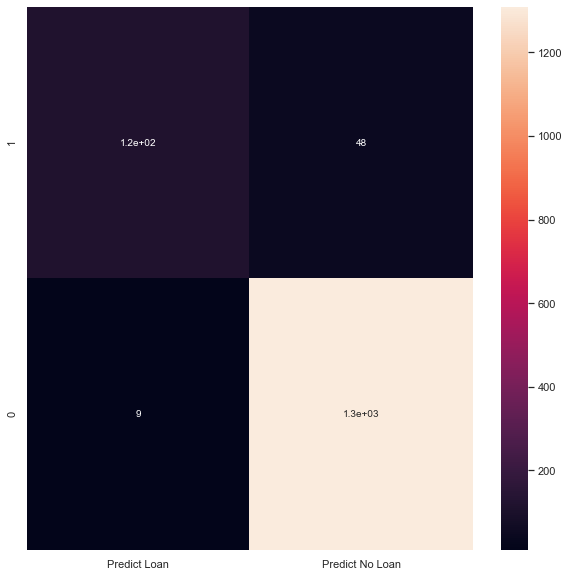

In [976]:
#Predict for train set
y_test_predict = logreg.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Loan","Predict No Loan"]])

plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

#### Notes:
* TP = 120 = 8.16% - Correctly predicted that the customers have a Personal Loan
* FP = 5 = 0.34%-  incorrectly predicted that the customers have personal loan
* TN = 1300 = 88.5% - Correctly predicted that the customers dont have a Personal Loan
* FN = 44 = 3% - incorrectly predicted that the customers dont have personal loan

In [977]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_train_predict) )
print('Accuracy on test data:',accuracy_score(y_test, y_test_predict))


Accuracy on train data: 0.966214265088074
Accuracy on test data: 0.9616161616161616


In [978]:
#Accuracy
accuracy = (120+1300)/(120+5+1300+44)
accuracy

0.966643975493533

In [979]:
#Specificity 
specificity = (1300)/(1300+5)
specificity

0.9961685823754789

In [980]:
#Sensitivity
sensitivity = 120/(120+44)
sensitivity

0.7317073170731707

In [981]:
#Precision
precision = 120/(120+5)
precision

0.96

#### Observation:
* Accuracy is almost the same on both train and test data.
* Specificity, sensitivity and Precision numbers are higher for test data
* we want to predict which customers have highest chances of taking a personal loan. we want to keep our Sensiticity high so we can target those customers (TP is high, FP is low)

#### AUC ROC Curve

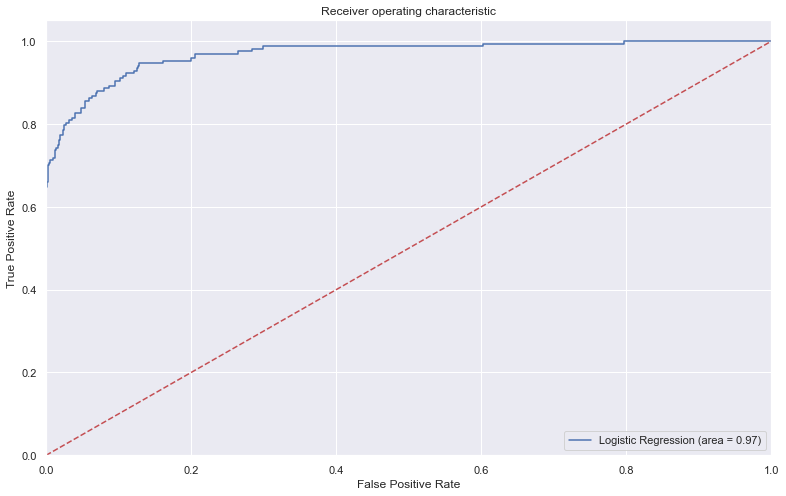

In [982]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Observation:
* 0.97 of the area is under the curve, which is very good

### Optimal Threshold

In [983]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.05541906395088516


In [984]:
target_names = ['Predict Loan', 'Predict No Loan']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

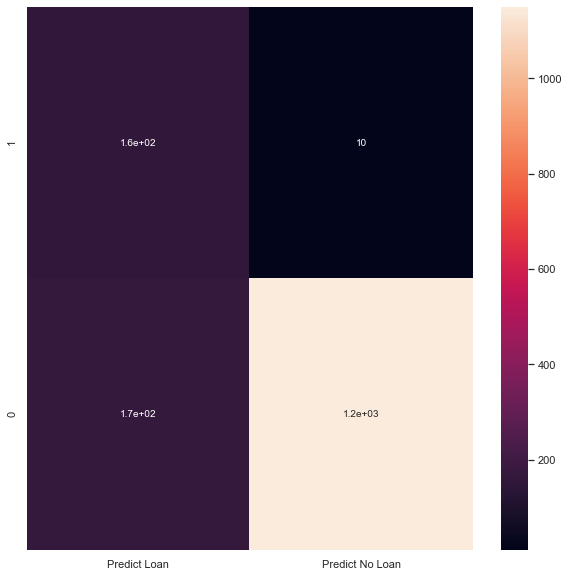

In [985]:
cm=metrics.confusion_matrix(y_test, y_pred_ts, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Loan","Predict No Loan"]])

plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

In [986]:
#Accuracy with optimal threhold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))


Accuracy on train data: 0.875541438059486
Accuracy on test data: 0.8801346801346801


### Observations:
* After using optimal threshold, TP has increased from 120 to 150 which is 25% and FN have fallen from 44 to 12, a 72.73% reduction.
* FN means we predicted a customer will not take a loan but they did, so if this number is high we will lose potential loan customers. Optimal threshold has reduced FN, while increasing TP which means we correctly identified more customers that will take a personal loan using optimal threshold

In [987]:
X.head()

Age  Experience     Income  ZIPCode    CCAvg  Family_2  Family_3  Family_4  \
0   25           1  49.000000    91107 1.600000         0         0         1   
1   45          19  34.000000    90089 1.500000         0         1         0   
2   39          15  11.000000    94720 1.000000         0         0         0   
3   35           9 100.000000    94112 2.700000         0         0         0   
4   35           8  45.000000    91330 1.000000         0         0         1   

   Education_2  Education_3  Securities_Account_1  CD_Account_1  Online_1  \
0            0            0                     1             0         0   
1            0            0                     1             0         0   
2            0            0                     0             0         0   
3            1            0                     0             0         0   
4            1            0                     0             0         0   

   CreditCard_1  binned_Mortgage_$100k-$199k  binned_Mortgage_$200k-$299k  \
0             0                            0                            0   
1             0                            0                            0   
2             0                            0                            0   
3             0                            0                            0   
4             1                            0                            0   

   binned_Mortgage_$300k-$399k  binned_Mortgage_Over $400k  
0                            0                           0  
1                            0                           0  
2                            0                           0  
3                            0                           0  
4                            0                           0

## Decision Tree Model

In [988]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(3463, 18) (1485, 18)
(3463, 1) (1485, 1)


In [989]:
# Build the tree
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [990]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [991]:
print("Accuracy on training set : ",model.score(X_train, y_train))
print("Accuracy on test set : ",model.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9791245791245792


In [992]:
#Checking number of positives
y.sum(axis = 0)


Personal_Loan    480
dtype: int64

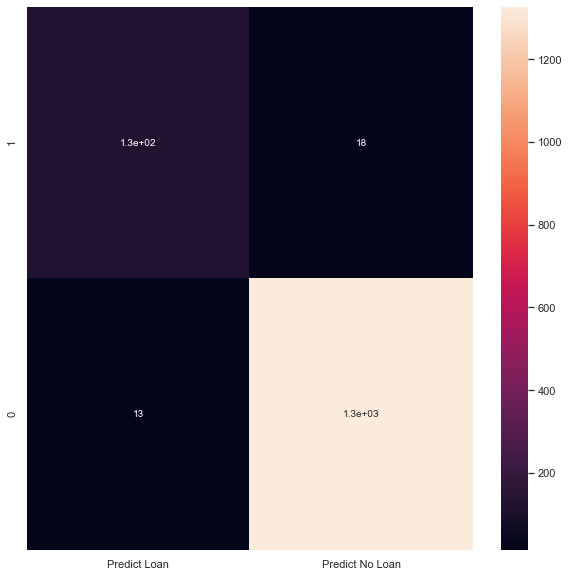

In [993]:
y_predict = model.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Loan","Predict No Loan"]])

plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

### Observation:
* TP = 130 = 8.89%
* FP = 13 = 0.9%
* TN = 1300 = 88.9%
* FN = 18 = 1.23%

In [994]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [995]:
# Recall on train and test
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8758620689655172


### there isnt much disparity in the performance of model on training and test set. model is not overfitting too much

In [996]:
tree_TP = 130
tree_FP = 13 
tree_TN = 1300
tree_FN = 18

In [997]:
#Accuracy
accuracy = (tree_TP+tree_TN)/(tree_TP+tree_TN+tree_FP+tree_FN)
accuracy

0.9787816563997263

In [998]:
#Specificity 
specificity = tree_TN/(tree_TN+tree_FP)
specificity

0.9900990099009901

In [999]:
#Sensitivity
sensitivity = tree_TP/(tree_TP+tree_FN)
sensitivity

0.8783783783783784

In [1000]:
#Precision
precision = tree_TP/(tree_TP+tree_FP)
precision

0.9090909090909091

### Observation;
* Accuracy and other metrics are all very high


#### Visualizing the Decision Tree

In [1001]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'binned_Mortgage_$100k-$199k', 'binned_Mortgage_$200k-$299k', 'binned_Mortgage_$300k-$399k', 'binned_Mortgage_Over $400k']


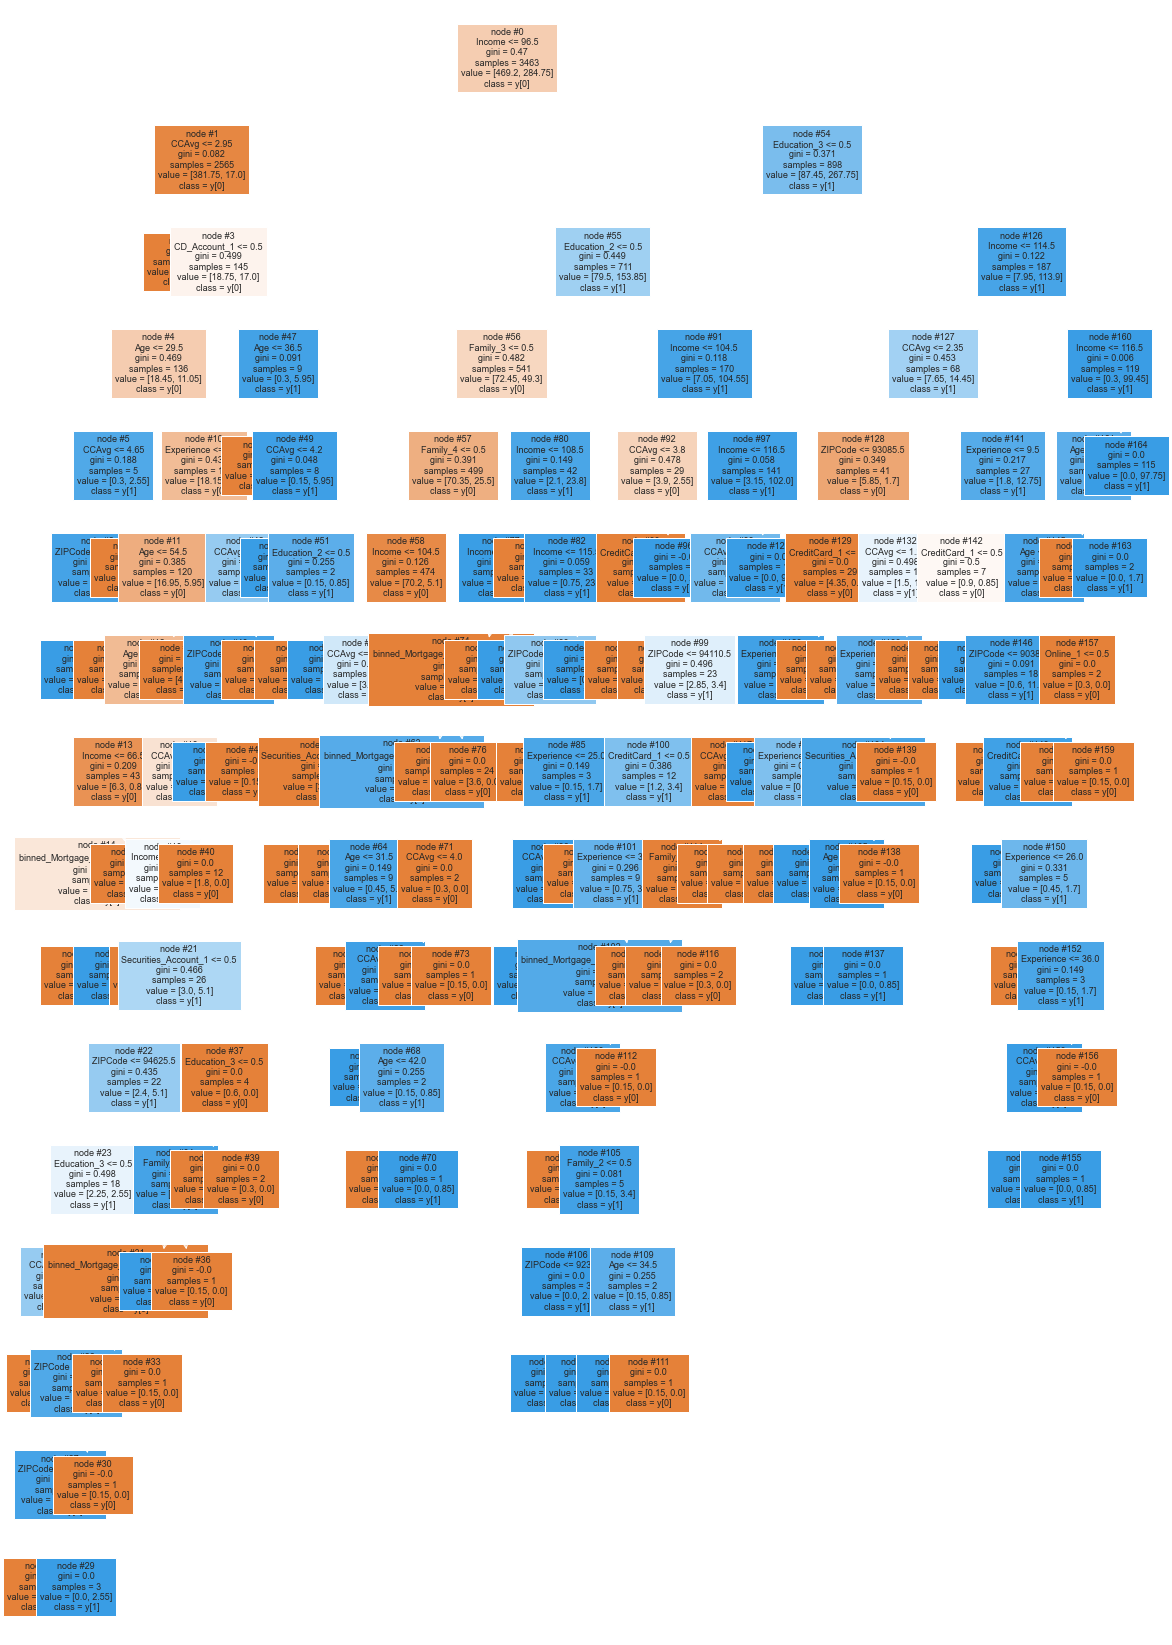

In [1002]:
plt.figure(figsize=(20,30))
tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1003]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 96.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [363.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Age <= 29.50
|   |   |   |   |--- CCAvg <= 4.65
|   |   |   |   |   |--- ZIPCode <= 94869.00
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- ZIPCode >  94869.00
|   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |--- CCAvg >  4.65
|   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |--- Age >  29.50
|   |   |   |   |--- Experience <= 33.50
|   |   |   |   |   |--- Age <= 54.50
|   |   |   |   |   |   |--- Age <= 42.50
|   |   |   |   |   |   |   |--- Income <= 66.50
|   |   |   |   |   |   |   |   |--- binned_Mortgage_$200k-$299k <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.05, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- binned_Mortgage_$200k-$299k >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class:

In [1004]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
Income                      0.591192
Education_2                 0.093682
CCAvg                       0.088261
Family_4                    0.077946
Family_3                    0.049047
...                              ...
Family_2                    0.000891
Online_1                    0.000000
binned_Mortgage_$100k-$199k 0.000000
binned_Mortgage_$300k-$399k 0.000000
binned_Mortgage_Over $400k  0.000000

[18 rows x 1 columns]


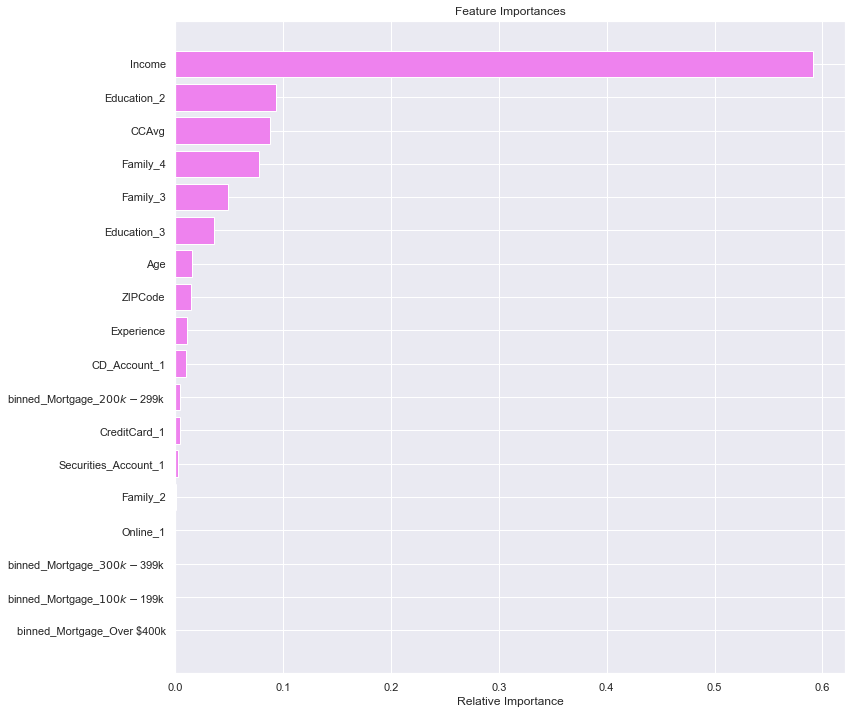

In [1005]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the customer chances of taking a Personal Loan.

### Reducing over fitting

In [1006]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

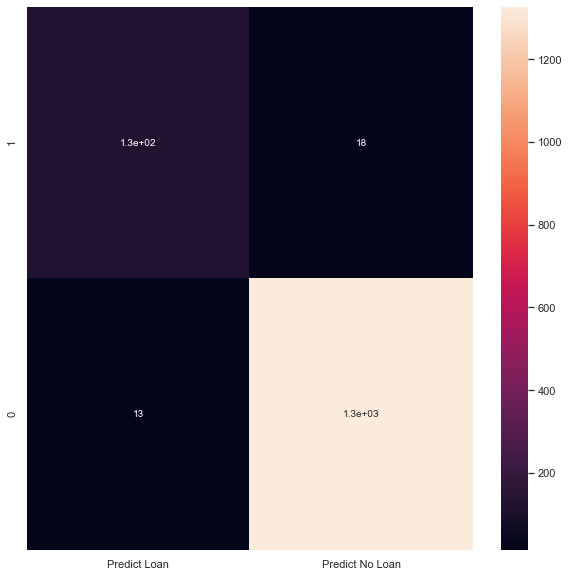

In [1007]:
y_predict = model.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Loan","Predict No Loan"]])

plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

In [1008]:
# Accuracy on train and test
print("Accuracy on training set : ",model1.score(X_train, y_train))
print("Accuracy on test set : ",model1.score(X_test, y_test))
# Recall on train and test
get_recall_score(model1)

Accuracy on training set :  0.9705457695639619
Accuracy on test set :  0.9649831649831649
Recall on training set :  0.7164179104477612
Recall on test set :  0.6896551724137931


* Recall on training set has reduced from 1 to 0.72 which is an improvement because now the model is not overfitting and we have a more generalized model.

#### Visualizing the Decision Tree

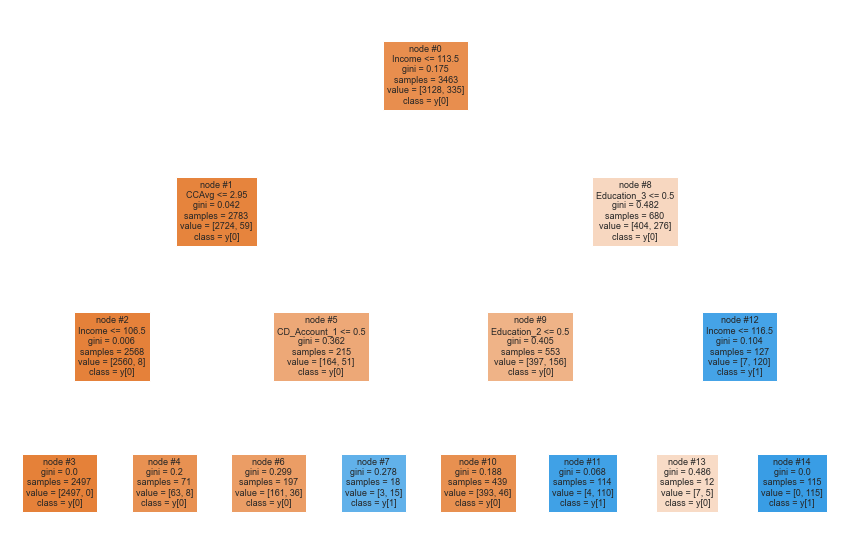

In [1042]:
plt.figure(figsize=(15,10))

tree.plot_tree(model1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1010]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2497.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [63.00, 8.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- weights: [161.00, 36.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [3.00, 15.00] class: 1
|--- Income >  113.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- weights: [393.00, 46.00] class: 0
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [4.00, 110.00] class: 1
|   |--- Education_3 >  0.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [7.00, 5.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 115.00] class: 1



#### Observation
* The tree has become readable now but the recall on test set has decreased

In [1011]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Income                     0.396265
Education_2                0.310519
Education_3                0.210417
CCAvg                      0.050422
CD_Account_1               0.032377
...                             ...
Family_4                   0.000000
Family_3                   0.000000
Family_2                   0.000000
ZIPCode                    0.000000
binned_Mortgage_Over $400k 0.000000

[18 rows x 1 columns]


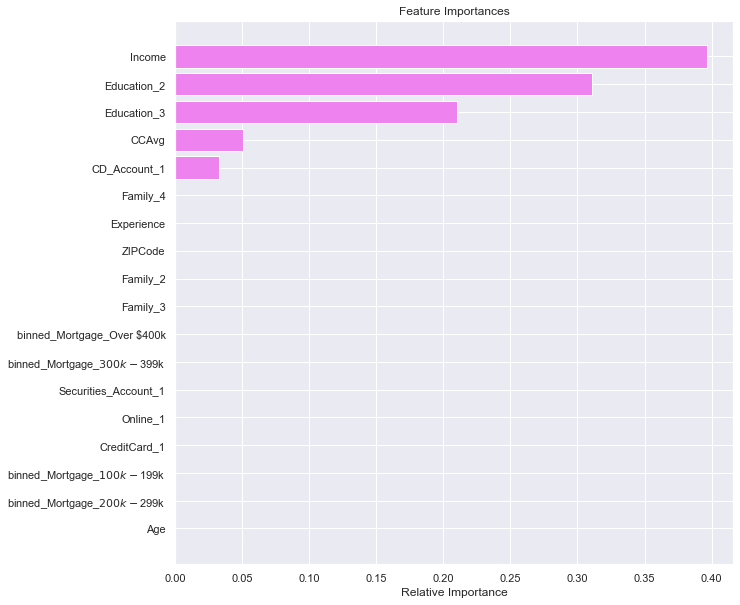

In [1012]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation:
* Income is still the most important but the importance of Education_2 and Education _3 have also improved 

### Using GridSearch for Hyperparameter tuning tree model

In [1013]:
from sklearn.model_selection import GridSearchCV

In [1014]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

#### Confusion Matrix 


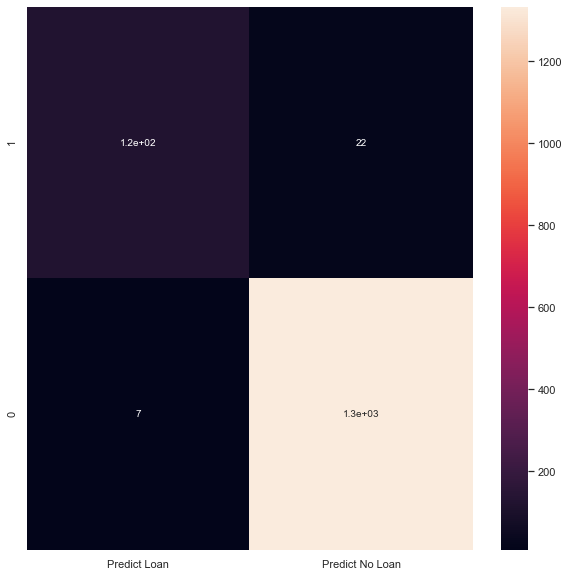

In [1015]:
y_predict = estimator.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Loan","Predict No Loan"]])

plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

### Observation:
* FP have gone down by 46% 
* FN have gone up by 22.22%, we dont mind FN going up

In [1016]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.983829049956685
Accuracy on test set :  0.9804713804713805
Recall on training set :  0.8537313432835821
Recall on test set :  0.8482758620689655


* Recall has improved for both test and train 

### VIsualizing Tree

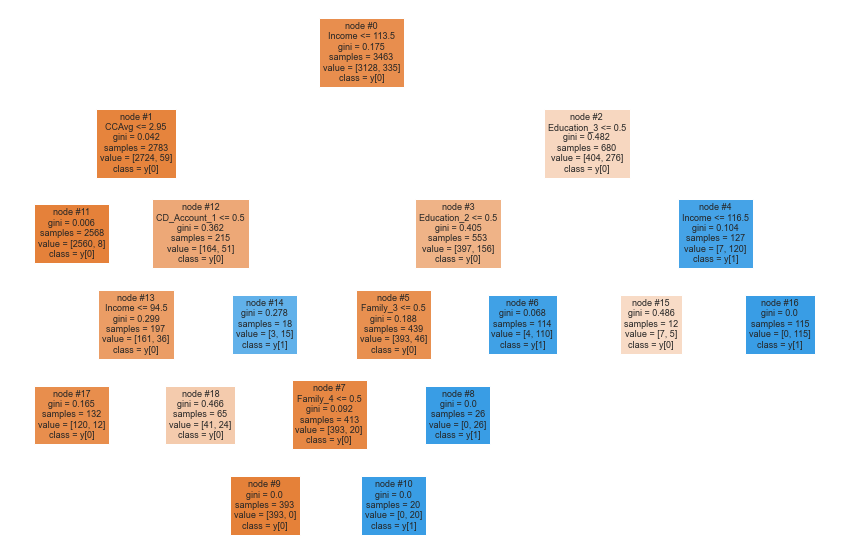

In [1017]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1018]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2560.00, 8.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- weights: [120.00, 12.00] class: 0
|   |   |   |--- Income >  94.50
|   |   |   |   |--- weights: [41.00, 24.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [3.00, 15.00] class: 1
|--- Income >  113.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [393.00, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.00, 20.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [0.00, 26.00] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [4.00, 110.00] class: 1
|   |--- Education_3 >  0.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [7.00, 5.00] class: 0
|   |  

In [1019]:

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))




                                Imp
Income                     0.339147
Education_2                0.258213
Education_3                0.174973
Family_3                   0.085418
Family_4                   0.073397
...                             ...
Securities_Account_1       0.000000
Experience                 0.000000
Family_2                   0.000000
ZIPCode                    0.000000
binned_Mortgage_Over $400k 0.000000

[18 rows x 1 columns]


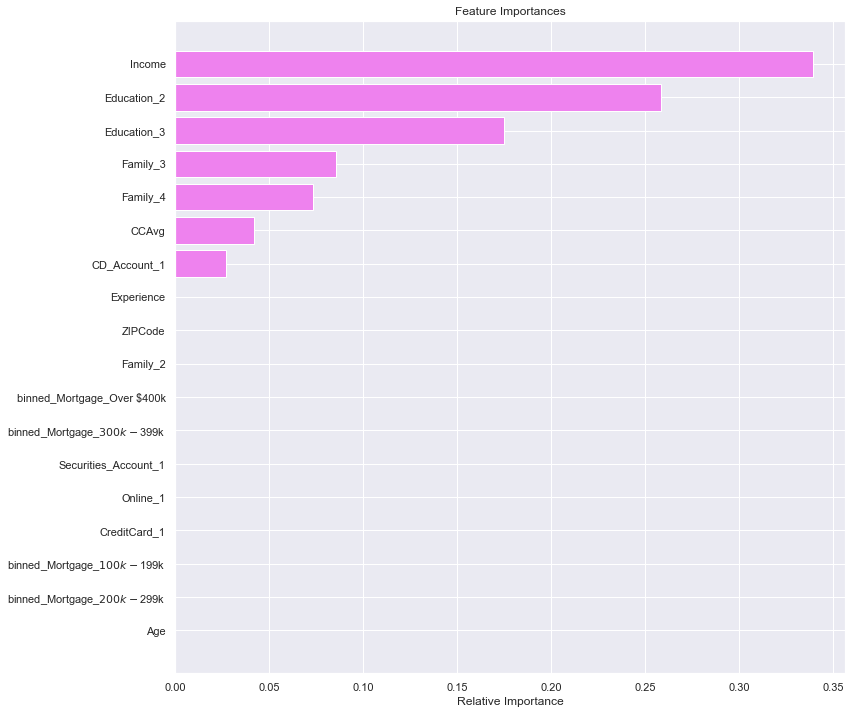

In [1020]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation:
* Family has also risen in importance

## Cost Complexity Pruning

In [1021]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [1022]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000231    0.000462
2     0.000248    0.000957
3     0.000270    0.002035
4     0.000270    0.002574
..         ...         ...
31    0.006279    0.039401
32    0.010991    0.050392
33    0.012791    0.063184
34    0.032435    0.128054
35    0.046704    0.174758

[36 rows x 2 columns]

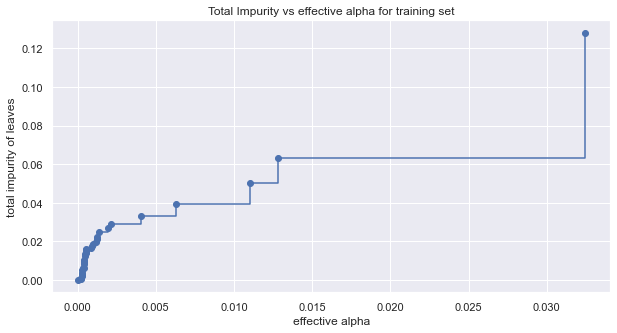

In [1023]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [1024]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0467037050176459


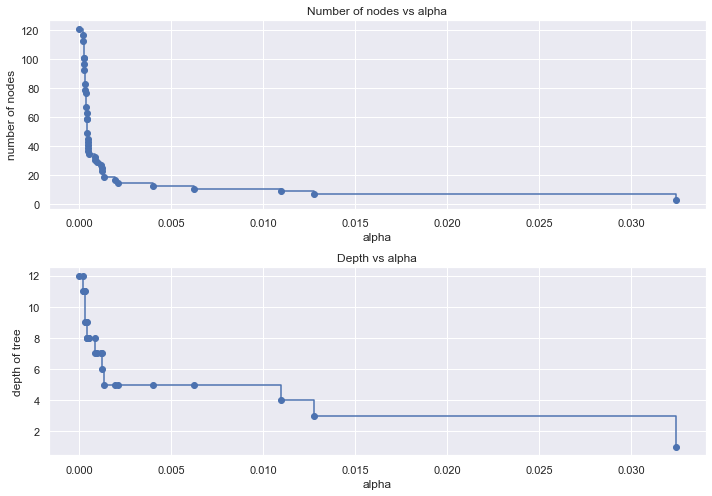

In [1025]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs alpha for training and testing sets

In [1026]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

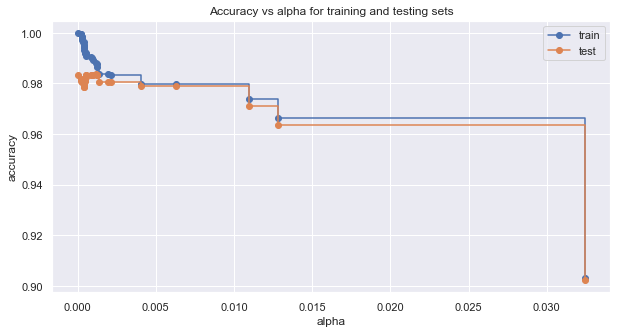

In [1027]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [1028]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0011791317739917222, random_state=1)
Training accuracy of best model:  0.9881605544325729
Test accuracy of best model:  0.9838383838383838


### Let's check Recall/Sensitivity for train and test set

In [1029]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [1030]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

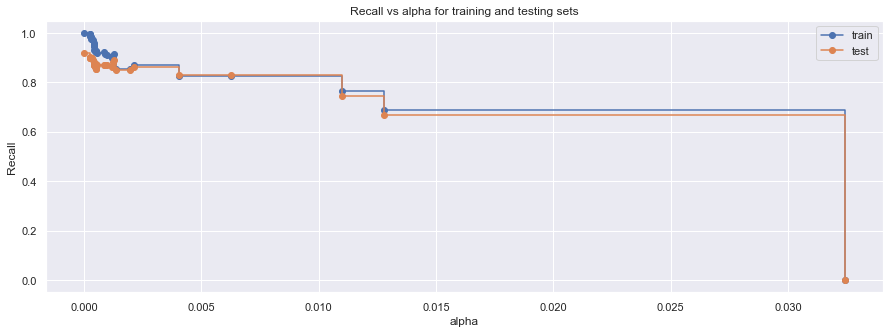

In [1031]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [1032]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [1033]:
#### Confusion Matrix of post pruned decision tree

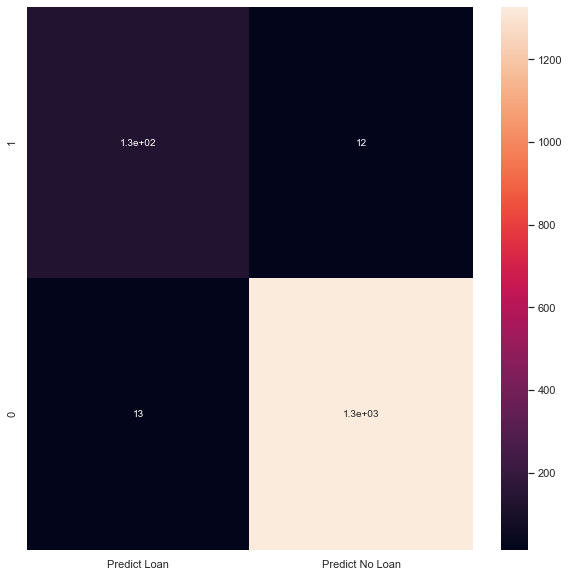

In [1034]:
y_predict = best_model.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Loan","Predict No Loan"]])

plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

In [1035]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.9172413793103448


#### Observation:
* Post pruning is overfitting as Recall has gone back to 1. We had the highest recall on both training and test data with GridSearch

### Visualizing the Decision Tree

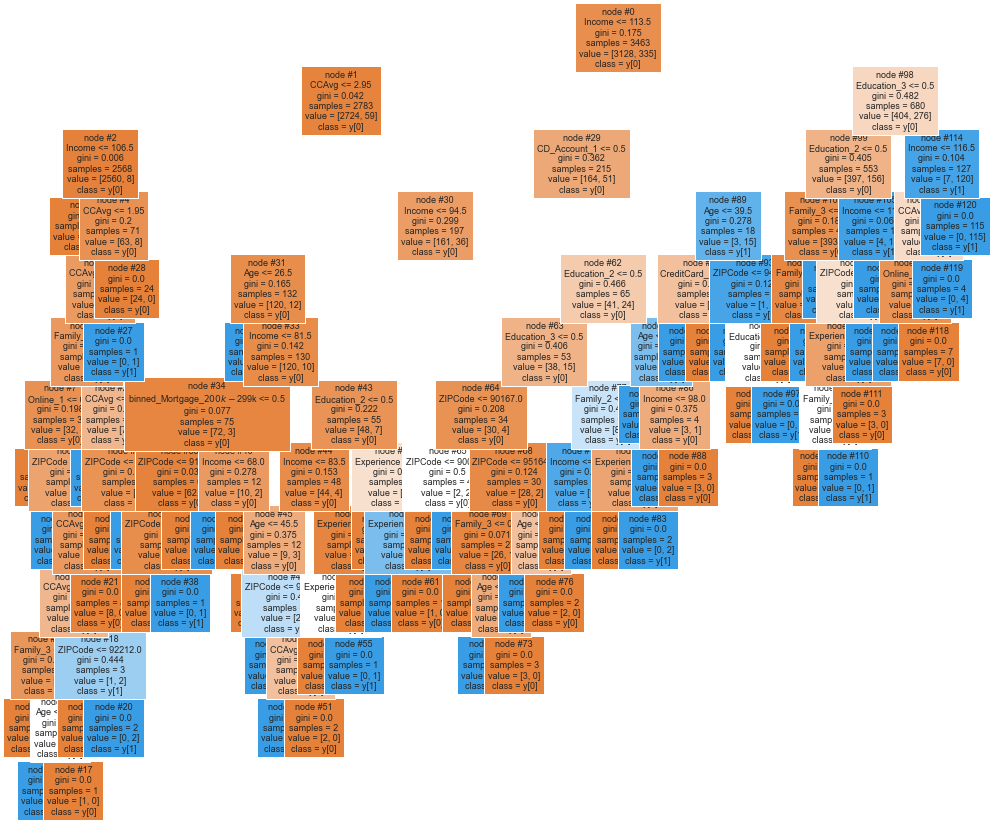

In [1036]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### Observation
* Tree has become complex again

In [1037]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2497.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- CCAvg <= 1.95
|   |   |   |   |--- CCAvg <= 1.85
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- Online_1 <= 0.50
|   |   |   |   |   |   |   |--- weights: [17.00, 0.00] class: 0
|   |   |   |   |   |   |--- Online_1 >  0.50
|   |   |   |   |   |   |   |--- ZIPCode <= 90056.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- ZIPCode >  90056.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 1.25
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 1.05
|   |   |   |   |   |   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   | 

In [1038]:

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
Income                      0.313832
Education_2                 0.232375
Education_3                 0.158507
Family_3                    0.075080
Family_4                    0.065470
...                              ...
binned_Mortgage_$200k-$299k 0.000757
Securities_Account_1        0.000000
binned_Mortgage_$100k-$199k 0.000000
binned_Mortgage_$300k-$399k 0.000000
binned_Mortgage_Over $400k  0.000000

[18 rows x 1 columns]


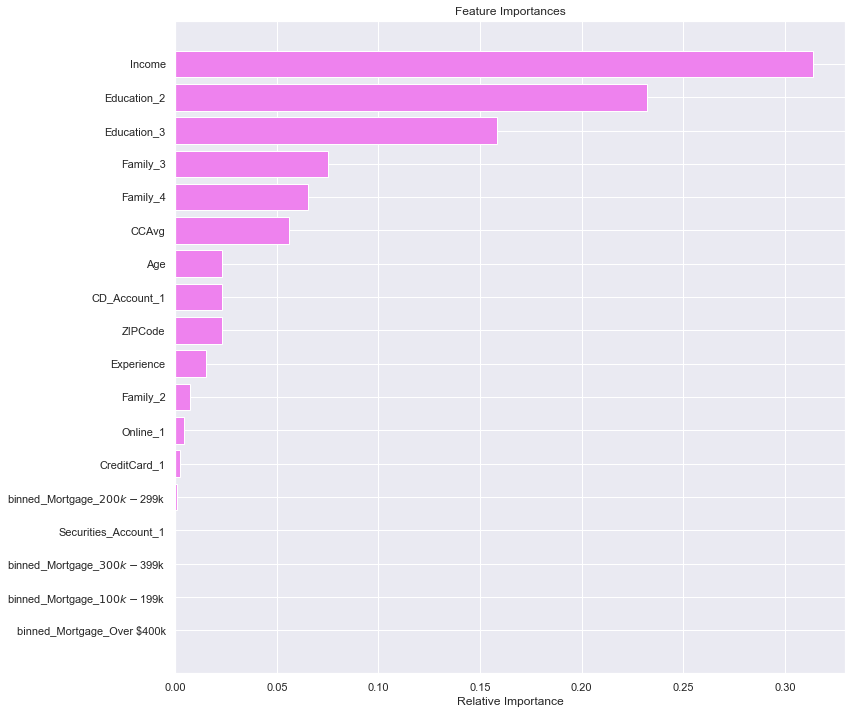

In [1039]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing all the decision tree models

In [1040]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.72,0.85,1], 'Test_Recall':[0.88,0.69,0.85,0.92]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                  Initial decision tree model      1.000000     0.880000
1  Decision tree with restricted maximum depth      0.720000     0.690000
2    Decision treee with hyperparameter tuning      0.850000     0.850000
3              Decision tree with post-pruning      1.000000     0.920000

In [1041]:
### Desicion tree with hyperparameter tuning gives the highest recall on test without overfitting.

In [1044]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          4948 non-null   int64  
 1   Experience                   4948 non-null   int64  
 2   Income                       4948 non-null   float64
 3   ZIPCode                      4948 non-null   int64  
 4   CCAvg                        4948 non-null   float64
 5   Family_2                     4948 non-null   uint8  
 6   Family_3                     4948 non-null   uint8  
 7   Family_4                     4948 non-null   uint8  
 8   Education_2                  4948 non-null   uint8  
 9   Education_3                  4948 non-null   uint8  
 10  Securities_Account_1         4948 non-null   uint8  
 11  CD_Account_1                 4948 non-null   uint8  
 12  Online_1                     4948 non-null   uint8  
 13  CreditCard_1      